<div style="font-size:28px; font-weight:bold;color:red; border: 1px solid #ccc; background-color: #f9f9f9; padding: 10px; border-radius: 5px;">
     Oscars et diversité : <em>95 ans de progrès ou d’illusion ?</em>
</div>

## Sommaire

1. Introduction
2. Préparation des données
3. Nettoyage des données
4. Statistiques descriptives
5. Analyse par categorie :
   - WRITING – Les scénaristes
   - DIRECTING – Les réalisateurs
   - ACTOR IN A LEADING ROLE – Les Acteurs Principaux
   - ACTRESS IN A LEADING ROLE – Les Actrices Principales
   - ACTOR IN A SUPPORTING ROLE – Les Acteurs Secondaires
   - ACTRESS IN A SUPPORTING ROLE – Les Actrices Secondaires
6. Le croisement des catégories
7. Les Mouvements Sociaux Clés : 
   - #OscarsSoWhite
   - #MeToo
   - #BlackLivesMatter & Stop Asian Hate

## Introduction
<div style="font-size:16px; line-height:1.3; border-left: 5px solid #e60000; background-color: #fff0f0; padding: 10px; ;">
<strong>Ce projet présente une analyse statistique de la diversité ethnique et de genre aux Oscars, de 1929 à 2024.</strong><br><br>
Nous étudions l’évolution de la représentation dans quatre catégories majeures : acteur·ice principal·e, second rôle, réalisation et scénario.<br><br>
L’objectif est de mesurer les progrès en termes d’inclusion et de représentation : observer comment la diversité a été prise en compte <em>ou pas</em> dans les nominations et les récompenses, et faire ressortir les écarts et déséquilibres persistants au fil du temps.<br><br>
L’analyse se conclura par des recommandations qui visent à encourager une inclusion plus équitable au sein du secteur du cinéma.
</div>

## Préparation des données

In [5]:
import pandas as pd 
path = "C:/Users/dell/Desktop/Oscar_Analysis_Project/"

In [6]:
# - Le fichier "clean_df" contient les nominations officielles aux Oscars, bien structurées avec 
#   toutes les années et catégories principales, mais sans informations sur le genre et la race.
# - Le fichier "messy_df" contient ces informations (genre et race), mais il est moins bien structuré et s'arrête à 2020. 

In [7]:
# ===================== EXPLORATION INITIALE DU DATAFRAME "CLEAN_DF" =====================

clean_df=pd.read_csv(path+"the_oscar_award.csv")

# Affichage des dimensions du dataframe
print("\n--- Dimensions du dataframe ---\n",clean_df.shape)

# Affichage des noms des colonnes
print("\n--- Listes des colonnes ---\n",clean_df.columns)

# Affichage des catégories principales
print("\n--- Catégories principales (canon_category) ---\n",clean_df["canon_category"].unique())


--- Dimensions du dataframe ---
 (11110, 8)

--- Listes des colonnes ---
 Index(['year_film', 'year_ceremony', 'ceremony', 'category', 'canon_category',
       'name', 'film', 'winner'],
      dtype='object')

--- Catégories principales (canon_category) ---
 ['ACTOR IN A LEADING ROLE' 'ACTRESS IN A LEADING ROLE' 'ART DIRECTION'
 'CINEMATOGRAPHY' 'DIRECTING (Comedy Picture)'
 'DIRECTING (Dramatic Picture)' 'VISUAL EFFECTS' 'BEST PICTURE'
 'UNIQUE AND ARTISTIC PICTURE' 'WRITING (Adapted Screenplay)'
 'WRITING (Original Story)' 'WRITING (Title Writing)' 'SPECIAL AWARD'
 'DIRECTING' 'SOUND RECORDING' 'SHORT FILM (Animated)'
 'SHORT SUBJECT (Comedy)' 'SHORT SUBJECT (Novelty)' 'ASSISTANT DIRECTOR'
 'FILM EDITING' 'MUSIC (Original Song Score or Adaptation Score)'
 'MUSIC (Original Song)' 'DANCE DIRECTION' 'ACTOR IN A SUPPORTING ROLE'
 'ACTRESS IN A SUPPORTING ROLE' 'SHORT SUBJECT (Color)'
 'SHORT SUBJECT (One-reel)' 'SHORT SUBJECT (Two-reel)'
 'IRVING G. THALBERG MEMORIAL AWARD' 'MUSIC (Orig

In [8]:
# ===================== EXPLORATION INITIALE DU DATAFRAME "MESSY_DF" =====================

messy_df=pd.read_excel(path+"oscars.xlsx")

# Affichage des dimensions du dataframe
print("\n--- Dimensions du dataframe ---\n",messy_df.shape)


# Affichage des noms des colonnes
print("\n--- Listes des colonnes ---\n",messy_df.columns)


# Affichage des catégories principales
print("\n--- Catégories principales (Category) ---\n",messy_df["Category"].unique())


--- Dimensions du dataframe ---
 (10396, 9)

--- Listes des colonnes ---
 Index(['year_film', 'year_ceremony', 'ceremony', 'Category', 'gender', 'name',
       'Race', 'film', 'winner'],
      dtype='object')

--- Catégories principales (Category) ---
 ['Best Actor' 'Best Actress' 'Best Actor in supporting role'
 'ACTRESS IN A SUPPORTING ROLE' 'PRODUCTION DESIGN' 'CINEMATOGRAPHY'
 'DIRECTING (Comedy Picture)' 'DIRECTING (Dramatic Picture)'
 'ENGINEERING EFFECTS' 'BEST PICTURE' 'UNIQUE AND ARTISTIC PICTURE'
 'WRITING (Adapted Screenplay)' 'WRITING (Original Story)'
 'WRITING (Title Writing)' 'SPECIAL AWARD' 'DIRECTING' 'SOUND RECORDING'
 'SHORT SUBJECT (Cartoon)' 'SHORT SUBJECT (Comedy)'
 'SHORT SUBJECT (Novelty)' 'ASSISTANT DIRECTOR' 'FILM EDITING'
 'MUSIC (Scoring)' 'MUSIC (Song)' 'DANCE DIRECTION'
 'SHORT SUBJECT (Color)' 'SHORT SUBJECT (One-reel)'
 'SHORT SUBJECT (Two-reel)' 'IRVING G. THALBERG MEMORIAL AWARD'
 'MUSIC (Original Score)' 'SPECIAL EFFECTS'
 'ART DIRECTION (Black-and-W

In [9]:
# ==================    PRÉPARATION DU DATAFRAME PRINCIPAL "clean_df"  =========================

# Le dataframe s'appelle ici "clean_df", mais sera filtré et renommé "filtered_clean" dans les cellules suivantes.
# Ne pas confondre les deux noms : "filtered_clean" est la version nettoyée et prête pour l’analyse.


In [10]:
# ================== STANDARDISATION DES CATÉGORIES “WRITING” ET “DIRECTING” ====================

#Mise à jour des catgéories principales : regroupement des variantes de "Writing" et "Directing"

clean_df["canon_category"] = clean_df["canon_category"].apply(lambda x: 
    "WRITING" if "WRITING" in x else 
    "DIRECTING" if "DIRECTING" in x else x
)

print(clean_df["canon_category"].unique())

['ACTOR IN A LEADING ROLE' 'ACTRESS IN A LEADING ROLE' 'ART DIRECTION'
 'CINEMATOGRAPHY' 'DIRECTING' 'VISUAL EFFECTS' 'BEST PICTURE'
 'UNIQUE AND ARTISTIC PICTURE' 'WRITING' 'SPECIAL AWARD' 'SOUND RECORDING'
 'SHORT FILM (Animated)' 'SHORT SUBJECT (Comedy)'
 'SHORT SUBJECT (Novelty)' 'ASSISTANT DIRECTOR' 'FILM EDITING'
 'MUSIC (Original Song Score or Adaptation Score)' 'MUSIC (Original Song)'
 'DANCE DIRECTION' 'ACTOR IN A SUPPORTING ROLE'
 'ACTRESS IN A SUPPORTING ROLE' 'SHORT SUBJECT (Color)'
 'SHORT SUBJECT (One-reel)' 'SHORT SUBJECT (Two-reel)'
 'IRVING G. THALBERG MEMORIAL AWARD' 'MUSIC (Original Score)'
 'CINEMATOGRAPHY (Black-and-White)' 'CINEMATOGRAPHY (Color)'
 'ART DIRECTION (Black-and-White)' 'ART DIRECTION (Color)'
 'DOCUMENTARY (Short Subject)' 'DOCUMENTARY (Feature)'
 'COSTUME DESIGN (Black-and-White)' 'COSTUME DESIGN (Color)'
 'SPECIAL FOREIGN LANGUAGE FILM AWARD' 'INTERNATIONAL FEATURE FILM'
 'HONORARY AWARD' 'JEAN HERSHOLT HUMANITARIAN AWARD' 'COSTUME DESIGN'
 'SHORT F

In [11]:
# ======================= SÉLECTION DES CATÉGORIES PRINCIPALES POUR L’ANALYSE ======================

target_categories = [
    "ACTOR IN A LEADING ROLE",
    "ACTRESS IN A LEADING ROLE",
    "ACTOR IN A SUPPORTING ROLE",
    "ACTRESS IN A SUPPORTING ROLE",
    "DIRECTING",
    "WRITING"
]

check = clean_df["canon_category"].isin(target_categories)
filtered_clean = clean_df[check].copy()

print("\n--- Dimensions du dataframe ---\n", filtered_clean.shape)
print("\n--- Catégories conservées ---\n", filtered_clean["canon_category"].unique())


--- Dimensions du dataframe ---
 (3368, 8)

--- Catégories conservées ---
 ['ACTOR IN A LEADING ROLE' 'ACTRESS IN A LEADING ROLE' 'DIRECTING'
 'WRITING' 'ACTOR IN A SUPPORTING ROLE' 'ACTRESS IN A SUPPORTING ROLE']


In [12]:
# ==================== VÉRIFICATION DES NOMS MANQUANTS pour "fitlered_clean" ====================

# Vérification des valeurs manquantes existantes dans la colonne name 

missing_name_count = filtered_clean["name"].isna().sum()
print("Nombre des noms manquants:", missing_name_count)

Nombre des noms manquants: 0


In [13]:
#======================= SUPPRESSION DES NOMINATIONS PARTAGÉES =============================

#Verification avant suppresion 
print("Nombre des lignes avant la suppresion des nominations partagés:", filtered_clean.shape[0])


# Comptage des nominations partagées entre plusieurs personnes ("/" dans les noms)
more_than_One_person_count = filtered_clean[
    filtered_clean["name"].str.contains("/")].shape[0]
print("Nombre de nominations partagées détectée: ",more_than_One_person_count)


#Suppression des nominations partagées 
filtered_clean = filtered_clean[
    ~filtered_clean["name"].str.contains("/")
].copy()


#Vérifications des dimensions après suppression
print("Nombre de lignes après suppression des nominations partagées:",filtered_clean.shape[0])

Nombre des lignes avant la suppresion des nominations partagés: 3368
Nombre de nominations partagées détectée:  424
Nombre de lignes après suppression des nominations partagées: 2944


In [14]:
#===================== TRAITEMENT DES VALEURS MANQUANTES dans "messy_df" =========================

# Détection des valeurs manquantes dans (nom , genre et race )
na_count=messy_df[["name","gender","Race"]].isna().sum()
print("Nombre de valeurs manquantes:\n",na_count)


# Affichage de la ligne avec le nom manquant
missing_name_row=messy_df[messy_df["name"].isna()]
print("\nLa ligne avec le nom manquant :")
display(missing_name_row)


#Supression de la ligne où la valeur du nom est manquante
messy_df=messy_df[~messy_df["name"].isna()].copy()


#Vérification après suppression
print("Vérification aprés suppression du nombre de NA: ",messy_df["name"].isna().sum())

Nombre de valeurs manquantes:
 name      1
gender    0
Race      0
dtype: int64

La ligne avec le nom manquant :


,year_film,year_ceremony,ceremony,Category,gender,name,Race,film,winner
6917,1983,1984,56,DOCUMENTARY (Short Subject),Female,NaN,White,You Are Free (Ihr Zent Frei),False


Vérification aprés suppression du nombre de NA:  0


In [15]:
#===================== NORMALISATION DES NOMS DANS LES DEUX DATAFRAMES =========================

# Normalisation des noms pour "messy_df"
messy_df["name_normalized"] = messy_df["name"].str.lower().str.strip()
print(messy_df[["name", "name_normalized"]].head())

# Normalisation des noms pour "filtered_clean"
filtered_clean["name_normalized"]=filtered_clean["name"].str.lower().str.strip()
print(filtered_clean[["name", "name_normalized"]].head())

            name name_normalized
0  Emil Jannings   emil jannings
1   Janet Gaynor    janet gaynor
2  Warner Baxter   warner baxter
3  Mary Pickford   mary pickford
4  George Arliss   george arliss
                  name      name_normalized
0  Richard Barthelmess  richard barthelmess
1  Richard Barthelmess  richard barthelmess
2        Emil Jannings        emil jannings
3        Emil Jannings        emil jannings
4       Louise Dresser       louise dresser


In [16]:
# ================ INTÉGRATION ET VÉRIFICATION DES DONNÉES DÉMOGRAPHIQUES ================

#Intégration des données manquantes ( genre et race ) dans “filtered_clean” par correspondance des noms  
race_lookup = dict(zip(messy_df["name_normalized"], messy_df["Race"]))
gender_lookup = dict(zip(messy_df["name_normalized"], messy_df["gender"]))


filtered_clean["race"] = filtered_clean["name_normalized"].map(race_lookup)
filtered_clean["gender"] = filtered_clean["name_normalized"].map(gender_lookup)

# Affichage des colonnes nouvellement ajoutées
print(filtered_clean[["name", "race", "gender"]].head(10))


# Vérification globale du dataframe après enrichissement
print("\n--- Vérification du dataframe après ajout du genre et de la race ---\n")
print("\nDimensions :", filtered_clean.shape)
print("\nColonnes :", filtered_clean.columns)
print("\nAffichage de base de données :\n")
display(filtered_clean)

                   name   race  gender
0   Richard Barthelmess  White    Male
1   Richard Barthelmess  White    Male
2         Emil Jannings  White    Male
3         Emil Jannings  White    Male
4        Louise Dresser  White  Female
5          Janet Gaynor  White  Female
6          Janet Gaynor  White  Female
7          Janet Gaynor  White  Female
8        Gloria Swanson  White  Female
17      Lewis Milestone  White    Male

--- Vérification du dataframe après ajout du genre et de la race ---


Dimensions : (2944, 11)

Colonnes : Index(['year_film', 'year_ceremony', 'ceremony', 'category', 'canon_category',
       'name', 'film', 'winner', 'name_normalized', 'race', 'gender'],
      dtype='object')

Affichage de base de données :



,year_film,year_ceremony,ceremony,category,canon_category,name,film,winner,name_normalized,race,gender
0,1927,1928,1,ACTOR,ACTOR IN A LEADING ROLE,Richard Barthelmess,The Noose,False,richard barthelmess,White,Male
1,1927,1928,1,ACTOR,ACTOR IN A LEADING ROLE,Richard Barthelmess,The Patent Leather Kid,False,richard barthelmess,White,Male
2,1927,1928,1,ACTOR,ACTOR IN A LEADING ROLE,Emil Jannings,The Last Command,True,emil jannings,White,Male
3,1927,1928,1,ACTOR,ACTOR IN A LEADING ROLE,Emil Jannings,The Way of All Flesh,True,emil jannings,White,Male
4,1927,1928,1,ACTRESS,ACTRESS IN A LEADING ROLE,Louise Dresser,A Ship Comes In,False,louise dresser,White,Female
...,...,...,...,...,...,...,...,...,...,...,...
11030,2024,2025,97,DIRECTING,DIRECTING,Coralie Fargeat,The Substance,False,coralie fargeat,NaN,NaN
11097,2024,2025,97,WRITING (Adapted Screenplay),WRITING,Peter Straughan,Conclave,True,peter straughan,NaN,NaN
11101,2024,2025,97,WRITING (Original Screenplay),WRITING,Sean Baker,Anora,True,sean baker,NaN,NaN
11103,2024,2025,97,WRITING (Original Screenplay),WRITING,Jesse Eisenberg,A Real Pain,False,jesse eisenberg,White,Male


In [17]:
# ================ GESTION MANUELLE DES DONNÉES DÉMOGRAPHIQUES MANQUANTES ================

# Identification des lignes sans genre ou sans race
missing_RG = filtered_clean[
    filtered_clean["race"].isna() | filtered_clean["gender"].isna()]
print("Nombre de lignes avec race ou genre manquant :",missing_RG.shape[0])


# Export du fichier pour compléter les données manquantes manuellement 
missing_RG.to_csv("missing_race_gender_patch.csv", index=False)


#Import du fichier compléter (après ajout manuel des données)
patch_df = pd.read_csv("missing_race_gender_patch_updated.csv")
print("\nVérificationdes des valeurs manquantes dans le fichier complété : \n",patch_df[["race","gender"]].isna().sum())

Nombre de lignes avec race ou genre manquant : 211

Vérificationdes des valeurs manquantes dans le fichier complété : 
 race      0
gender    0
dtype: int64


In [18]:
# ================ INTÉGRATION DES DONNÉES COMPLÉTÉES MANUELLEMENT (GENRE & RACE) =================

# Fusion des données complétées "patch_df" avec "filtered_clean" (en utilisant "name_normalized")
filtered_clean = filtered_clean.merge(
    patch_df[["name_normalized", "race", "gender"]],
    on="name_normalized",
    how="left",
    suffixes=('', '_patch')
)


#Remplissage des valeurs manquantes du "filtered_clean" avec les données du patch 
filtered_clean["race"] = filtered_clean["race"].fillna(filtered_clean["race_patch"])
filtered_clean["gender"] = filtered_clean["gender"].fillna(filtered_clean["gender_patch"])


#Suppression des colonnnes patch aprés fusion et remplissage 
filtered_clean = filtered_clean.drop(columns=["race_patch", "gender_patch"])

#Vérification finale: plus aucune valeur manquante dans notre base de données finale pour "race" et "gender"
print("Nombre de lignes avec une valeur manquante dans 'race' ou 'gender' :",filtered_clean[filtered_clean["race"].isna() | filtered_clean["gender"].isna()].shape[0])

Nombre de lignes avec une valeur manquante dans 'race' ou 'gender' : 0


In [19]:
# ================= VÉRIFICATION GLOBALE DU DATAFRAME APRÈS ENRICHISSEMENT ====================

print("\nDimensions :", filtered_clean.shape)
print("\nColonnes :", list(filtered_clean.columns))
print("\nAffichage des premières lignes :\n")
display(filtered_clean.head())


Dimensions : (3040, 11)

Colonnes : ['year_film', 'year_ceremony', 'ceremony', 'category', 'canon_category', 'name', 'film', 'winner', 'name_normalized', 'race', 'gender']

Affichage des premières lignes :



,year_film,year_ceremony,ceremony,category,canon_category,name,film,winner,name_normalized,race,gender
0,1927,1928,1,ACTOR,ACTOR IN A LEADING ROLE,Richard Barthelmess,The Noose,False,richard barthelmess,White,Male
1,1927,1928,1,ACTOR,ACTOR IN A LEADING ROLE,Richard Barthelmess,The Patent Leather Kid,False,richard barthelmess,White,Male
2,1927,1928,1,ACTOR,ACTOR IN A LEADING ROLE,Emil Jannings,The Last Command,True,emil jannings,White,Male
3,1927,1928,1,ACTOR,ACTOR IN A LEADING ROLE,Emil Jannings,The Way of All Flesh,True,emil jannings,White,Male
4,1927,1928,1,ACTRESS,ACTRESS IN A LEADING ROLE,Louise Dresser,A Ship Comes In,False,louise dresser,White,Female


## Nettoyage des données

In [21]:
#============= Vérifications préliminaires ======================

#Vérifications des valeurs manquantes dans chaques colonnes 
print("\n--- Valeurs manquantes par colonne ---\n")
print(filtered_clean.isna().sum())

# Vérification des chaînes vides ("") dans chaque colonne
print("\n--- Chaînes vides par colonne ---\n")
print((filtered_clean == "").sum())

# Vérification des valeurs uniques par colonne (catégories clés)

print("\n--- Catégories principales (canon_category) ---\n")
print(filtered_clean["canon_category"].unique())

print("\n--- Genres uniques (gender) ---\n")
print(filtered_clean["gender"].unique())

print("\n--- Races uniques (race) ---\n")
print(filtered_clean["race"].unique())

print("\n--- Années couvertes (year_ceremony) ---\n")
print(filtered_clean["year_ceremony"].unique())

print("\n--- Valeurs possibles pour 'winner' (True = gagnant) ---\n")
print(filtered_clean["winner"].unique())


--- Valeurs manquantes par colonne ---

year_film          0
year_ceremony      0
ceremony           0
category           0
canon_category     0
name               0
film               2
winner             0
name_normalized    0
race               0
gender             0
dtype: int64

--- Chaînes vides par colonne ---

year_film          0
year_ceremony      0
ceremony           0
category           0
canon_category     0
name               0
film               0
winner             0
name_normalized    0
race               0
gender             0
dtype: int64

--- Catégories principales (canon_category) ---

['ACTOR IN A LEADING ROLE' 'ACTRESS IN A LEADING ROLE' 'DIRECTING'
 'WRITING' 'ACTOR IN A SUPPORTING ROLE' 'ACTRESS IN A SUPPORTING ROLE']

--- Genres uniques (gender) ---

['Male' 'Female' 'Male ']

--- Races uniques (race) ---

['White' 'Asian' 'Black' 'Hispanic' 'Middle Eastern' 'white'
 'Biracial (black+white)' 'Māori' 'Indigenous']

--- Années couvertes (year_ceremony) ---

[19

In [22]:
# ============== HARMONISATION DES VALEURS DANS LA COLONNE "race" =================

# Création d’un dictionnaire pour harmoniser les valeurs de la colonne "race"
race_dic = {
    "white": "White",
    "black": "Black",
    "biracial (black+white)": "Black", 
    "hispanic": "Hispanic",
    "asian": "Asian",
    "middle eastern": "Middle Eastern",
    "māori": "Māori",
    "indigenous": "Indigenous"
}

# Nettoyage et standardisation des valeurs de "race" avec le dictionnaire
filtered_clean["race"] = (
    filtered_clean["race"]
    .astype(str)
    .str.lower()
    .str.strip()
    .map(race_dic)
    .fillna(filtered_clean["race"])
)

# Vérification du résultat après nettoyage
print(filtered_clean["race"].unique())

['White' 'Asian' 'Black' 'Hispanic' 'Middle Eastern' 'Māori' 'Indigenous']


In [23]:
# ===================== HARMONISATION DES VALEURS DANS LA COLONNE "gender" =====================

filtered_clean["gender"] = filtered_clean["gender"].str.strip().str.capitalize()
print(filtered_clean["gender"].unique())

['Male' 'Female']


In [24]:
# ===================== DÉTECTION ET SUPPRESSION DES DOUBLONS =====================

# Détection des doublons (toutes copies incluses)
duplicates = filtered_clean[filtered_clean.duplicated(keep=False)]
print("Nombre total de lignes en doublon (toutes copies confondues) :", duplicates.shape[0])

# Export éventuel pour vérification manuelle
# duplicates.to_csv("duplicates_only.csv", index=False)

# Nombre de doublons à supprimer (on garde la première occurrence)
duplicate_count = filtered_clean.duplicated(keep="first").sum()
print("Nombre de doublons à supprimer :", duplicate_count)

# Suppression des doublons
filtered_clean = filtered_clean.drop_duplicates(keep="first")

# Vérification finale
print("Dimensions après suppression des doublons :", filtered_clean.shape)


Nombre total de lignes en doublon (toutes copies confondues) : 167
Nombre de doublons à supprimer : 96
Dimensions après suppression des doublons : (2944, 11)


In [25]:
# ===================== STRUCTURATION FINALE DU DATASET =====================

# Création de la colonne "decade" à partir de l'année de cérémonie
filtered_clean["decade"] = (filtered_clean["year_ceremony"] // 10) * 10

# Vérification de la bonne implémentation de la colonne "decade"
filtered_clean[["year_ceremony", "decade"]].head()

# Suppression des colonnes non nécessaires à l’analyse
filtered_clean.drop(columns=["name_normalized", "ceremony", "year_film"], inplace=True)

# Vérification des colonnes finales
print("Colonnes finales :", list(filtered_clean.columns))

#Vérification finale des dimensions du dataset
print(filtered_clean.shape)

Colonnes finales : ['year_ceremony', 'category', 'canon_category', 'name', 'film', 'winner', 'race', 'gender', 'decade']
(2944, 9)


## Statistiques descriptives

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

------ Répartition par catégorie principale ------
canon_category
WRITING                         613
ACTRESS IN A LEADING ROLE       484
ACTOR IN A LEADING ROLE         481
DIRECTING                       476
ACTOR IN A SUPPORTING ROLE      445
ACTRESS IN A SUPPORTING ROLE    445
Name: count, dtype: int64

----- Fréquence -----
canon_category
WRITING                         20.82
ACTRESS IN A LEADING ROLE       16.44
ACTOR IN A LEADING ROLE         16.34
DIRECTING                       16.17
ACTOR IN A SUPPORTING ROLE      15.12
ACTRESS IN A SUPPORTING ROLE    15.12
Name: proportion, dtype: float64


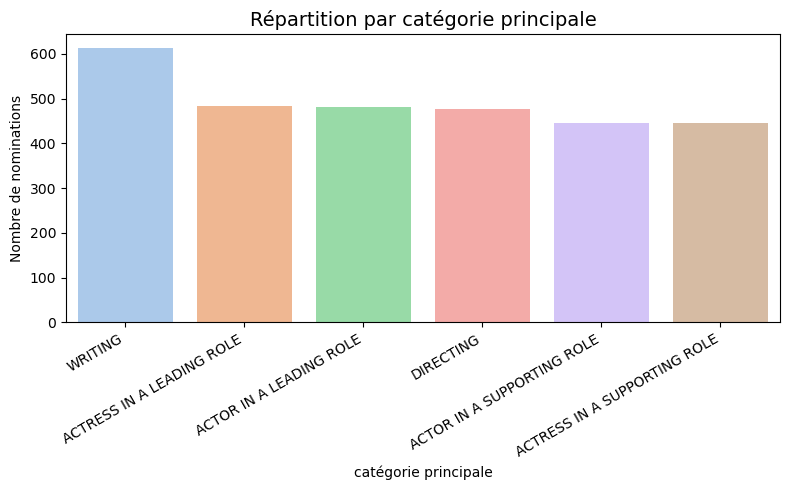

In [28]:
# Répartition des nominations par catégorie principale (nombre et %)

# --- Affichage des statistiques ---
print("------ Répartition par catégorie principale ------")
print(filtered_clean["canon_category"].value_counts())

print("\n----- Fréquence -----")
print(filtered_clean["canon_category"].value_counts(normalize=True).mul(100).round(2))


cn_counts= filtered_clean["canon_category"].value_counts()

#------ Création du graphique ------- 
plt.figure(figsize=(8, 5))
sns.barplot(x=cn_counts.index, y=cn_counts.values, palette="pastel", hue=cn_counts.index)

plt.title("Répartition par catégorie principale", fontsize=14)
plt.ylabel("Nombre de nominations")
plt.xlabel("catégorie principale")
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

------ Répartition par ethnicité ------
race
White             2762
Black              114
Asian               41
Hispanic            22
Middle Eastern       3
Māori                1
Indigenous           1
Name: count, dtype: int64

------ Fréquence ------
race
White             93.82
Black              3.87
Asian              1.39
Hispanic           0.75
Middle Eastern     0.10
Māori              0.03
Indigenous         0.03
Name: proportion, dtype: float64


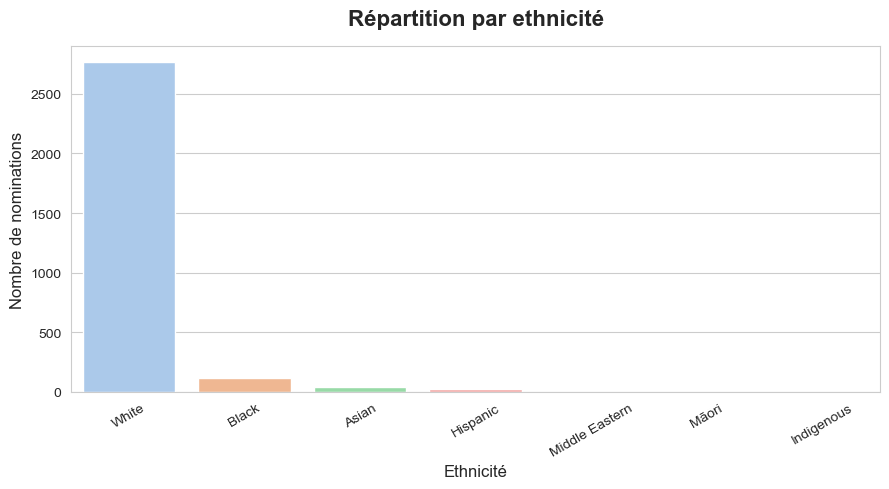

In [29]:
#==================== Répartition des nominations par ethnicité (nombre et %) =====================

# --- Affichage des statistiques ---
race_counts = filtered_clean["race"].value_counts()
race_freq = filtered_clean["race"].value_counts(normalize=True).mul(100).round(2)

print("------ Répartition par ethnicité ------")
print(race_counts)

print("\n------ Fréquence ------")
print(race_freq)

#------ Création du graphique ------- 

plt.figure(figsize=(9, 5))
sns.set_style("whitegrid")

sns.barplot(
    x=race_counts.index,
    y=race_counts.values,
    hue=race_counts.index,
    palette="pastel", 
    legend=False
)

plt.title("Répartition par ethnicité", fontsize=16, weight='bold', pad=15)
plt.ylabel("Nombre de nominations", fontsize=12)
plt.xlabel("Ethnicité", fontsize=12)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

----- Répartition par genre dans les catégories non genrées WRITING & DIRECTING -----
gender
Male      1024
Female      65
Name: count, dtype: int64

----- Fréquence -----
gender
Male      94.03
Female     5.97
Name: proportion, dtype: float64


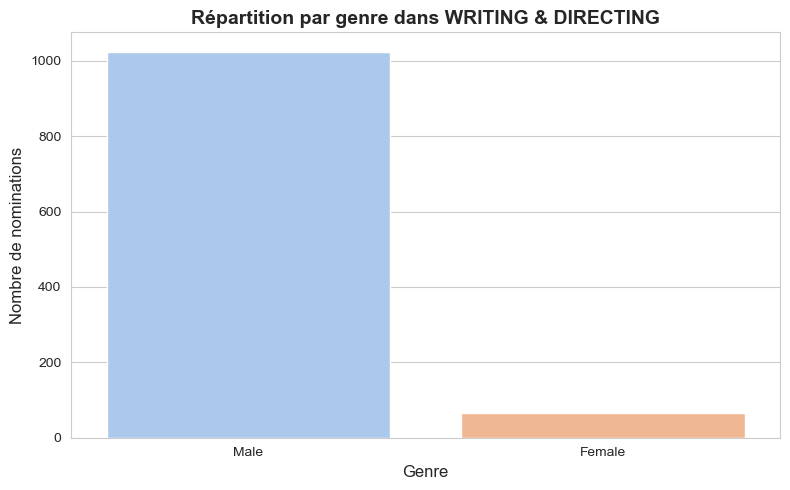

In [30]:
#============ Répartition par genre dans les catégories non genrées : WRITING & DIRECTING ===============

# --- Affichage des statistiques ---
non_gendered = filtered_clean[filtered_clean["canon_category"].isin(["WRITING", "DIRECTING"])]
gender_counts_wd = non_gendered["gender"].value_counts()
gender_freq_wd = non_gendered["gender"].value_counts(normalize=True).mul(100).round(2)

print("----- Répartition par genre dans les catégories non genrées WRITING & DIRECTING -----")
print(gender_counts_wd)

print("\n----- Fréquence -----")
print(gender_freq_wd)

#------ Création du graphique ------- 

plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")

sns.barplot(
    x=gender_counts_wd.index,
    y=gender_counts_wd.values,
    hue=gender_counts_wd.index,
    palette="pastel", 
    legend=False
)

plt.title("Répartition par genre dans WRITING & DIRECTING", fontsize=14, weight='bold')
plt.ylabel("Nombre de nominations", fontsize=12)
plt.xlabel("Genre", fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Analyse par categorie

### Analyse de la catégorie **"WRITING"** : les scénaristes

In [33]:
# ==============    PRÉPARATION DES DONNÉES:    =================

# Filtrage des réalisateurs:
df_directors = filtered_clean[
    filtered_clean['canon_category'].str.contains("directing", case=False, na=False)
]

# Filtrage des scénaristes:
df_writers = filtered_clean[
    filtered_clean['canon_category'].str.contains("writing", case=False, na=False)
]

# Vérification : dimensions et années récentes
print("Réalisateurs :", df_directors.shape)
print("Nominations par année (réalisateurs) :")
print(df_directors['year_ceremony'].value_counts().sort_index().tail(5))
print("\n")

print("Scénaristes :", df_writers.shape)
print("Nominations par année (scénaristes) :")
print(df_writers['year_ceremony'].value_counts().sort_index().tail(5))

Réalisateurs : (476, 9)
Nominations par année (réalisateurs) :
year_ceremony
2021    5
2022    5
2023    4
2024    5
2025    5
Name: count, dtype: int64


Scénaristes : (613, 9)
Nominations par année (scénaristes) :
year_ceremony
2021    6
2022    6
2023    6
2024    6
2025    4
Name: count, dtype: int64


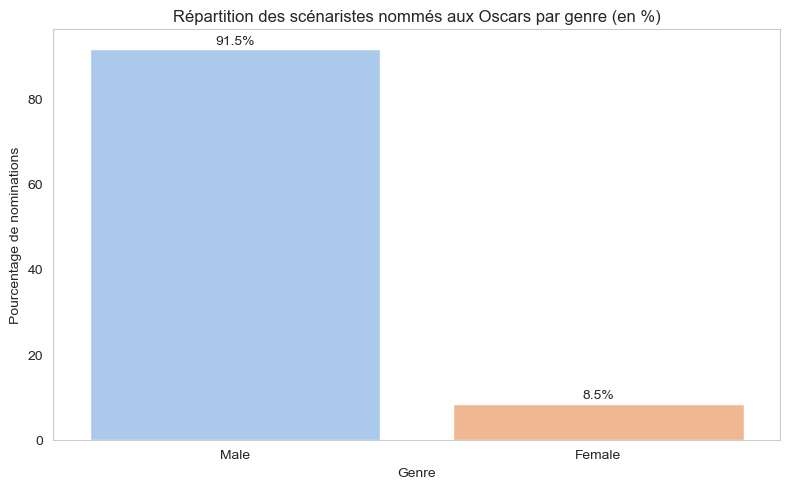

In [34]:
#==============  Répartition des scénaristes nommés aux Oscars par genre : ================

# Filtrer les scénaristes nominés:
df_writers = filtered_clean[
    (filtered_clean['canon_category'].str.contains("writing", case=False, na=False)) &
    (filtered_clean['winner'].isin([True, False]))
].copy()


# Grouper par genre (en pourcentage)
genre_percent = (df_writers['gender'].value_counts(normalize=True) * 100).sort_values(ascending=False)

#---------------- Graphique n°1 : Répartition des scénaristes nommés aux Oscars par genre (en %).

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=genre_percent.index, y=genre_percent.values, palette='pastel', hue=genre_percent.index, 
    legend=False)

# Ajouter les pourcentages au-dessus des barres
for i, value in enumerate(genre_percent.values):
    plt.text(i, value + 0.5, f'{value:.1f}%', ha='center', va='bottom', fontsize=10)

plt.title("Répartition des scénaristes nommés aux Oscars par genre (en %)")
plt.xlabel("Genre")
plt.ylabel("Pourcentage de nominations")
plt.tight_layout()
plt.grid(axis='y')
plt.show()

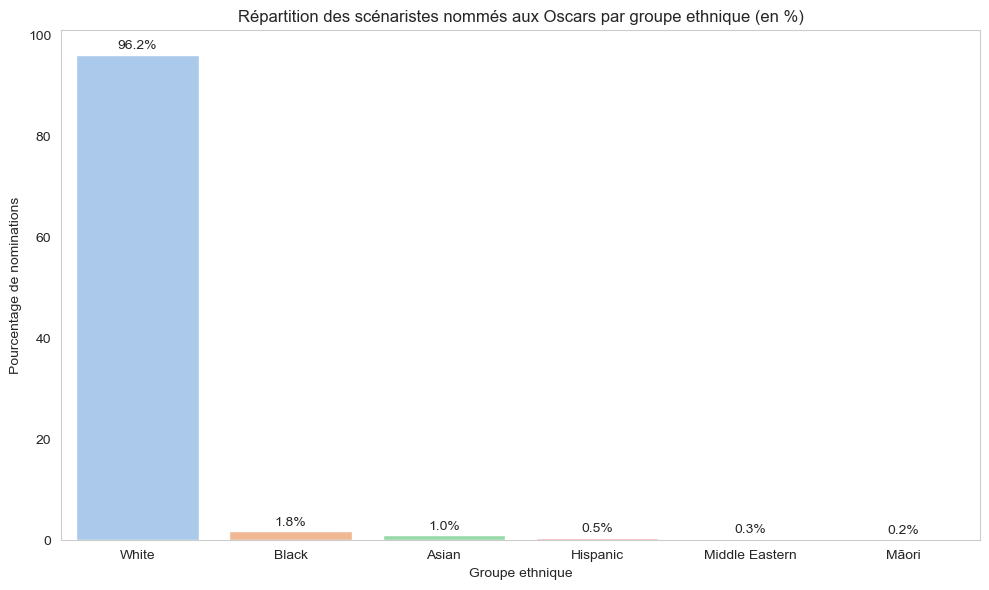

In [35]:
#===========   Répartition des scénaristes nommés aux Oscars par groupe ethnique: (graphe 3)  =============

# Filtrer les scénaristes nominés (en utilisant 'canon_category')
df_writers = filtered_clean[
    (filtered_clean['canon_category'].str.contains("writing", case=False, na=False)) &
    (filtered_clean['winner'].isin([True, False]))
].copy()

# Calculer les pourcentages par groupe ethnique
race_percent = (df_writers['race'].value_counts(normalize=True) * 100).sort_values(ascending=False)

#------------------ Graphique N°2:Répartition des scénaristes nommés aux Oscars par groupe ethnique.

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=race_percent.index, y=race_percent.values, palette='pastel', hue=race_percent.index, 
    legend=False)

# Ajouter les pourcentages au-dessus des barres
for i, value in enumerate(race_percent.values):
    plt.text(i, value + 0.5, f'{value:.1f}%', ha='center', va='bottom', fontsize=10)

plt.title("Répartition des scénaristes nommés aux Oscars par groupe ethnique (en %)")
plt.xlabel("Groupe ethnique")
plt.ylabel("Pourcentage de nominations")
plt.tight_layout()
plt.grid(axis='y')
plt.show()

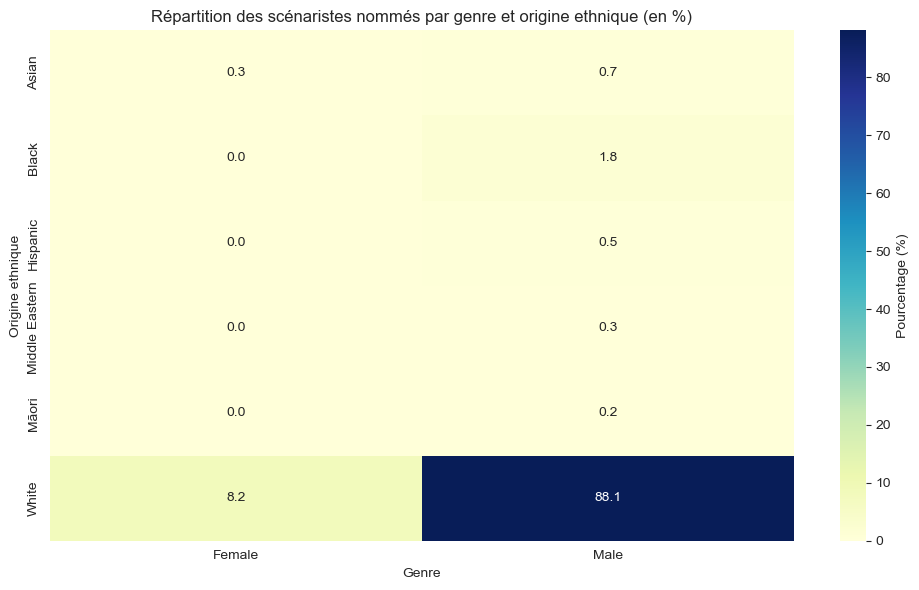

In [36]:
# Filtrer les scénaristes nommés
df_writers = filtered_clean[
    (filtered_clean['canon_category'].str.contains("writing", case=False, na=False)) &
    (filtered_clean['winner'].isin([True, False]))
].copy()

# Calcul du tableau croisé en pourcentage
crosstab = pd.crosstab(df_writers['race'], df_writers['gender'], normalize='all') * 100

#------------------  Graphique N°3:Répartition des scénaristes nommés par genre et origine ethnique.

plt.figure(figsize=(10, 6))
ax = sns.heatmap(crosstab, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'Pourcentage (%)'})
plt.title("Répartition des scénaristes nommés par genre et origine ethnique (en %)")
plt.xlabel("Genre")
plt.ylabel("Origine ethnique")
plt.tight_layout()
plt.show()

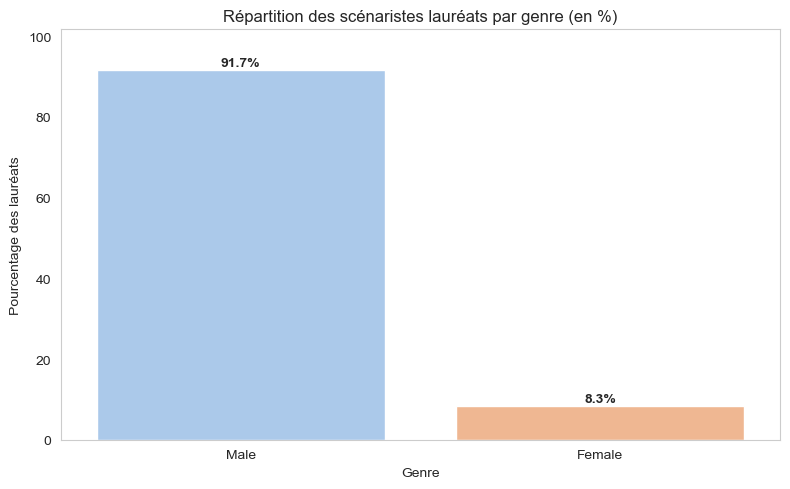

In [37]:
#===============  Répartition des scénaristes lauréats par genre:  ====================

# Filtrer les scénaristes lauréats
df_writers_winners = filtered_clean[
    (filtered_clean['canon_category'].str.contains("writing", case=False, na=False)) &
    (filtered_clean['winner'] == True)
].copy()

# Calcul des pourcentages
gender_counts = df_writers_winners['gender'].value_counts(normalize=True) * 100
gender_counts = gender_counts.sort_values(ascending=False)

#---------------  Graphique N°4:Répartition des scénaristes lauréats par genre.

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='pastel',hue=gender_counts.index, 
    legend=False)
                 
for i, v in enumerate(gender_counts.values):
    ax.text(i, v + 1, f"{v:.1f}%", ha='center', fontweight='bold')

plt.title("Répartition des scénaristes lauréats par genre (en %)")
plt.xlabel("Genre")
plt.ylabel("Pourcentage des lauréats")
plt.ylim(0, gender_counts.max() + 10)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

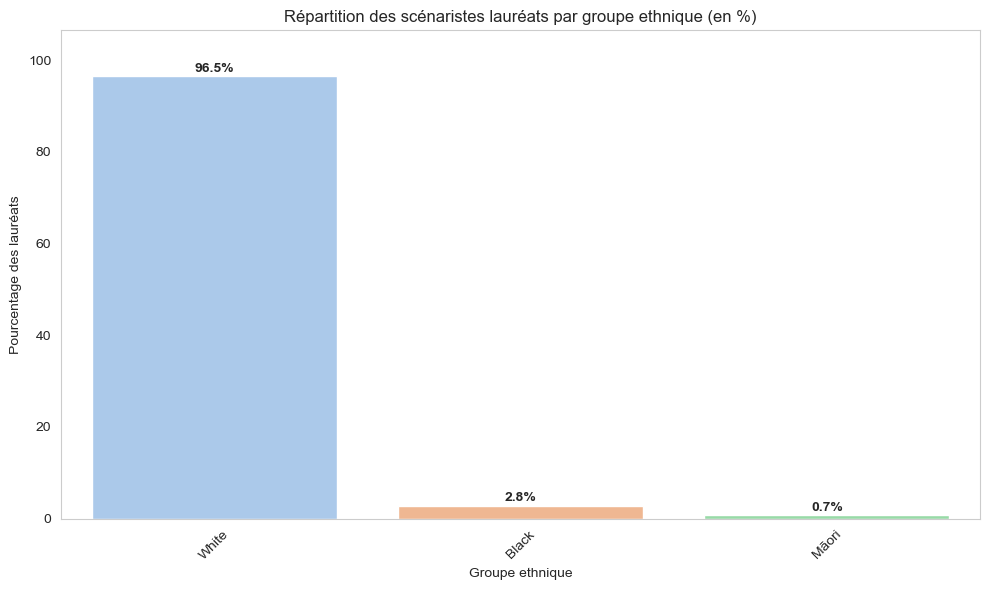

In [38]:
#===================  Répartition des scénaristes lauréats par origine ethnique:  ===================

# Filtrer les scénaristes lauréats
df_writers_winners = filtered_clean[
    (filtered_clean['canon_category'].str.contains("writing", case=False, na=False)) &
    (filtered_clean['winner'] == True)
].copy()

# Calcul des pourcentages
ethnicity_counts = df_writers_winners['race'].value_counts(normalize=True) * 100
ethnicity_counts = ethnicity_counts.sort_values(ascending=False)

# ----------- Graphique N°5:Répartition des scénaristes lauréats par groupe ethnique. 

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=ethnicity_counts.index, y=ethnicity_counts.values, palette='pastel',hue=ethnicity_counts.index, 
    legend=False)
for i, v in enumerate(ethnicity_counts.values):
    ax.text(i, v + 1, f"{v:.1f}%", ha='center', fontweight='bold')
plt.title("Répartition des scénaristes lauréats par groupe ethnique (en %)")
plt.xlabel("Groupe ethnique")
plt.ylabel("Pourcentage des lauréats")
plt.ylim(0, ethnicity_counts.max() + 10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

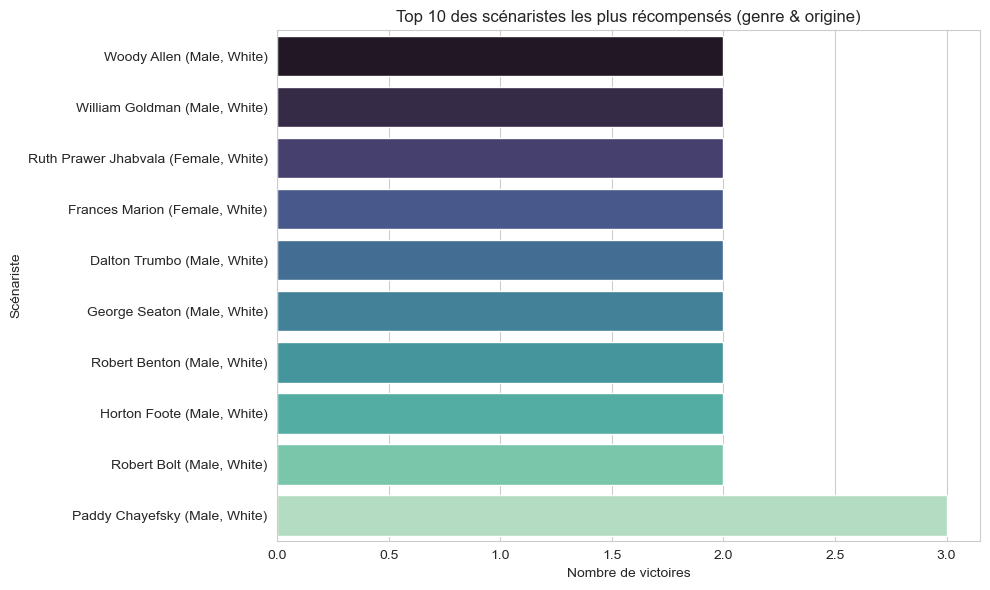

In [39]:
#======================  SCÉNARISTES LES PLUS RÉCOMPENSÉS : GENRE & ORIGINE  =====================

# Filtrer les gagnants dans la catégorie WRITING
writing_winners = filtered_clean[
    (filtered_clean['winner'] == True) & 
    (filtered_clean['canon_category'] == 'WRITING')
].copy()

# Vérification des colonnes pour s'assurer du nom correct
# print(writing_winners.columns)

# Top 10 des scénaristes les plus récompensés
top_writers = writing_winners.groupby('name').size().sort_values(ascending=False).head(10)

# Récupérer genre et origine ethnique
top_infos = writing_winners[
    writing_winners['name'].isin(top_writers.index)
][['name', 'gender', 'race']].drop_duplicates()

# Fusionner les infos
top_df = top_writers.reset_index().merge(top_infos, on='name')
top_df.columns = ['name', 'total_wins', 'gender', 'race']

# Créer une étiquette combinée
top_df['label'] = top_df['name'] + ' (' + top_df['gender'] + ', ' + top_df['race'] + ')'

# Trier pour l'affichage
top_df_sorted = top_df.sort_values('total_wins', ascending=True)

#--------------  Graphique N°6 : Top 10 des scénaristes les plus récompensés par genre et origine ethnique  
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_df_sorted,
    x='total_wins',
    y='label',
    palette='mako',
    hue='label', 
    legend=False
)
plt.title("Top 10 des scénaristes les plus récompensés (genre & origine)")
plt.xlabel("Nombre de victoires")
plt.ylabel("Scénariste")
plt.tight_layout()
plt.show()

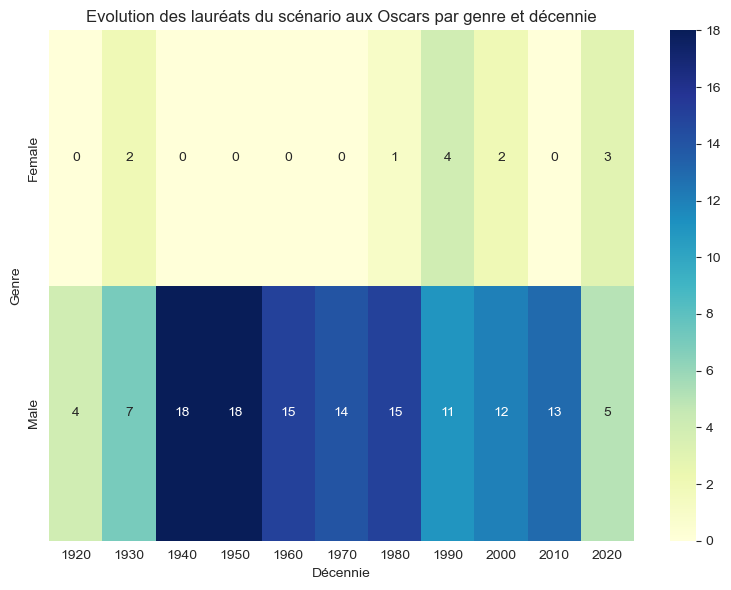

In [40]:
#================ Evolution des lauréats du scénario aux Oscars par genre et décennie: ================== 

# Comptage genre/décennie
heatmap_data = (
    filtered_clean[
        (filtered_clean['canon_category'] == 'WRITING') & 
        (filtered_clean['winner'] == True)
    ]
    .groupby(['decade', 'gender'])
    .size()
    .unstack(fill_value=0)
)

#------------- Graphique N°7: Evolution des lauréats du scénario aux Oscars par genre et décennie.

plt.figure(figsize=(8,6))
sns.heatmap(heatmap_data.T, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Evolution des lauréats du scénario aux Oscars par genre et décennie")
plt.xlabel("Décennie")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

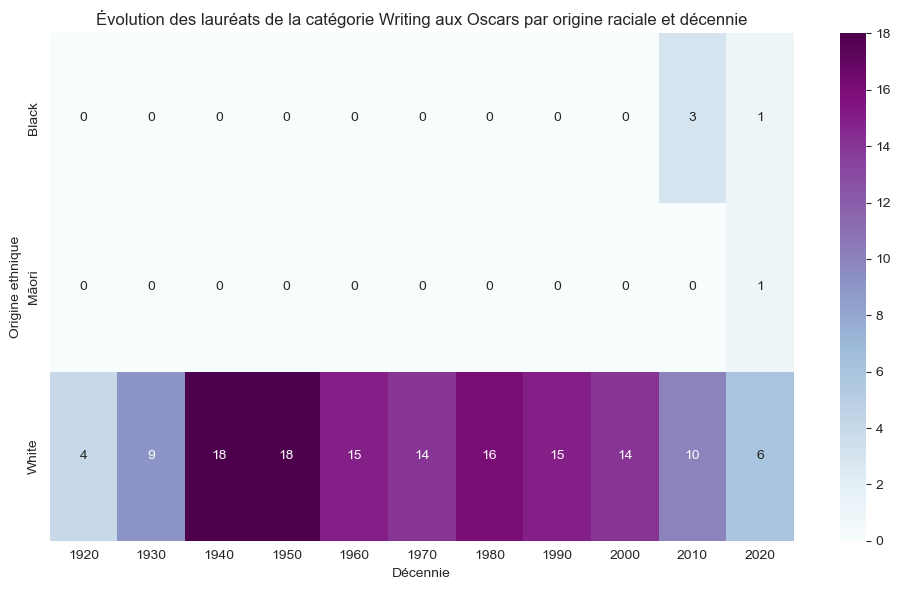

In [41]:
#=============  Évolution des lauréats de la catégorie Writing par origine ethnique et décennie:  ================
# Ajout de la colonne décennie  
filtered_clean['decade'] = (filtered_clean['year_ceremony'] // 10) * 10

# Filtrer uniquement les lauréats de la catégorie Writing avec race connue
writing_data = filtered_clean[
    (filtered_clean['canon_category'].str.contains('writing', case=False, na=False)) &
    (filtered_clean['winner'] == True) &
    (filtered_clean['race'].notna())
].copy()

# Regrouper par décennie et race
heatmap_writing = (
    writing_data
    .groupby(['decade', 'race'])
    .size()
    .unstack(fill_value=0)
)

#------------- Graphique 7-1 : Évolution des lauréats de la catégorie Writing par origine ethnique et décennie.

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_writing.T, annot=True, fmt='d', cmap='BuPu')
plt.title("Évolution des lauréats de la catégorie Writing aux Oscars par origine raciale et décennie")
plt.xlabel("Décennie")
plt.ylabel("Origine ethnique")
plt.tight_layout()
plt.show()

### Analyse de la catégorie **"DIRECTING"** : les réalisateurs

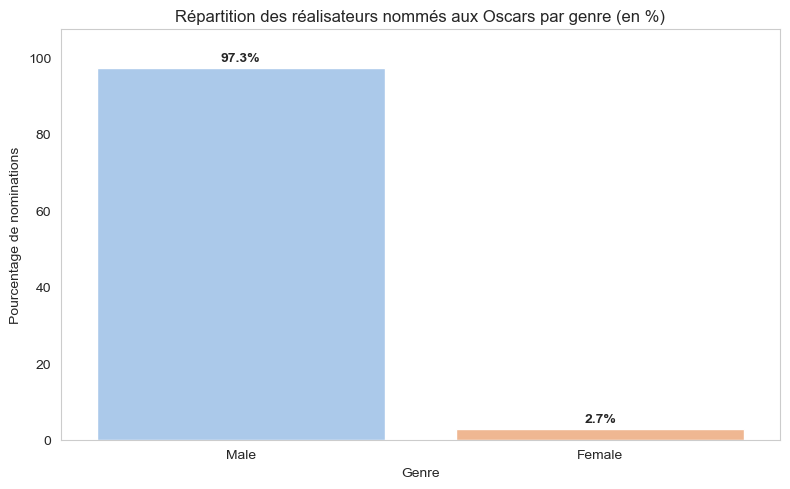

In [43]:
#================= Répartition des réalisateurs nommés aux Oscars: ================== 

# Filtrer les réalisateurs nominés
df_directors = filtered_clean[
    (filtered_clean['canon_category'].str.contains("directing", case=False, na=False)) &
    (filtered_clean['winner'].isin([True, False]))
].copy()

# Calcul des pourcentages
genre_counts = df_directors['gender'].value_counts(normalize=True).sort_values(ascending=False) * 100

#---------------- Graphique N°8:Répartition des réalisateurs nommés aux Oscars.

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='pastel',hue=genre_counts.index, 
    legend=False)

# Ajout des annotations (pourcentage au-dessus des barres)
for i, v in enumerate(genre_counts.values):
    ax.text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom', fontweight='bold')

plt.title("Répartition des réalisateurs nommés aux Oscars par genre (en %)")
plt.xlabel("Genre")
plt.ylabel("Pourcentage de nominations")
plt.ylim(0, max(genre_counts.values) + 10)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

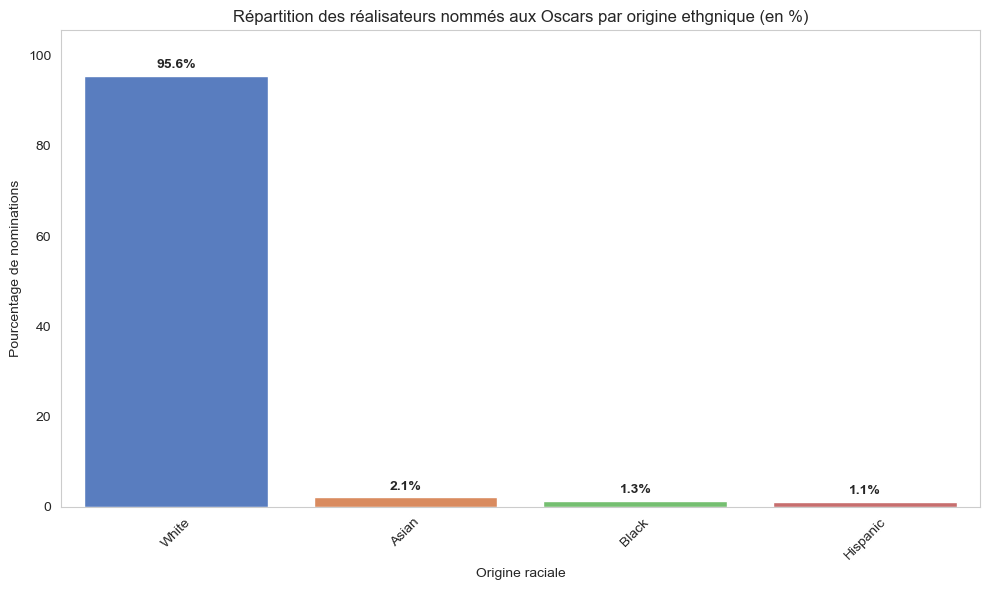

In [44]:
#===============  Répartition des réalisateurs nommés aux Oscars par genre ethnique: ======================

# Filtrer les réalisateurs nominés
df_directors = filtered_clean[
    (filtered_clean['canon_category'].str.contains("directing", case=False, na=False)) &
    (filtered_clean['winner'].isin([True, False]))
].copy()

# Calcul des pourcentages
race_counts = df_directors['race'].value_counts(normalize=True).sort_values(ascending=False) * 100

#---------------  Graphique N°8-1: Répartition des réalisateurs nommés aux Oscars par origine ethnique.

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=race_counts.index, y=race_counts.values, palette='muted',hue=race_counts.index, 
    legend=False)

# Ajout des annotations (pourcentage au-dessus des barres)
for i, v in enumerate(race_counts.values):
    ax.text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom', fontweight='bold')

plt.title("Répartition des réalisateurs nommés aux Oscars par origine ethgnique (en %)")
plt.xlabel("Origine raciale")
plt.ylabel("Pourcentage de nominations")
plt.ylim(0, max(race_counts.values) + 10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

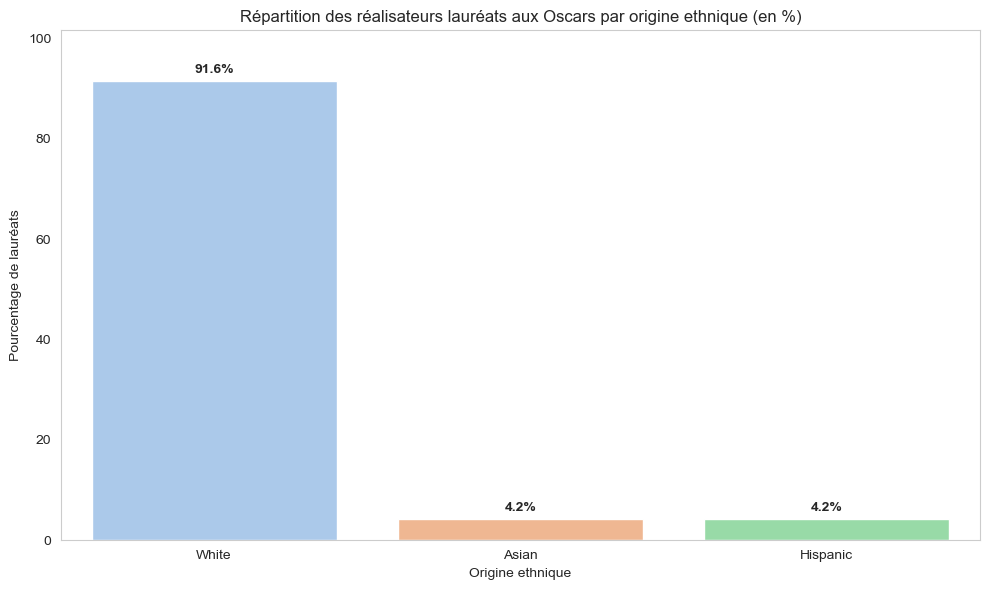

In [45]:
#================  Répartition des réalisateurs lauréats aux Oscars par origine ethnique: ======================

# Filtrer les réalisateurs lauréats
df_directors_winners = filtered_clean[
    (filtered_clean['canon_category'].str.contains("directing", case=False, na=False)) &
    (filtered_clean['winner'] == True)
].copy()

# Calcul des pourcentages
ethnicity_counts = df_directors_winners['race'].value_counts(normalize=True).sort_values(ascending=False) * 100

#--------------  Graphique N°9:Répartition des réalisateurs lauréats aux Oscars par origine ethnique.

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=ethnicity_counts.index, y=ethnicity_counts.values, palette='pastel',hue=ethnicity_counts.index, 
    legend=False)

# Affichage des pourcentages sur le graphique
for i, v in enumerate(ethnicity_counts.values):
    ax.text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom', fontweight='bold')

plt.title("Répartition des réalisateurs lauréats aux Oscars par origine ethnique (en %)")
plt.xlabel("Origine ethnique")
plt.ylabel("Pourcentage de lauréats")
plt.ylim(0, max(ethnicity_counts.values) + 10)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

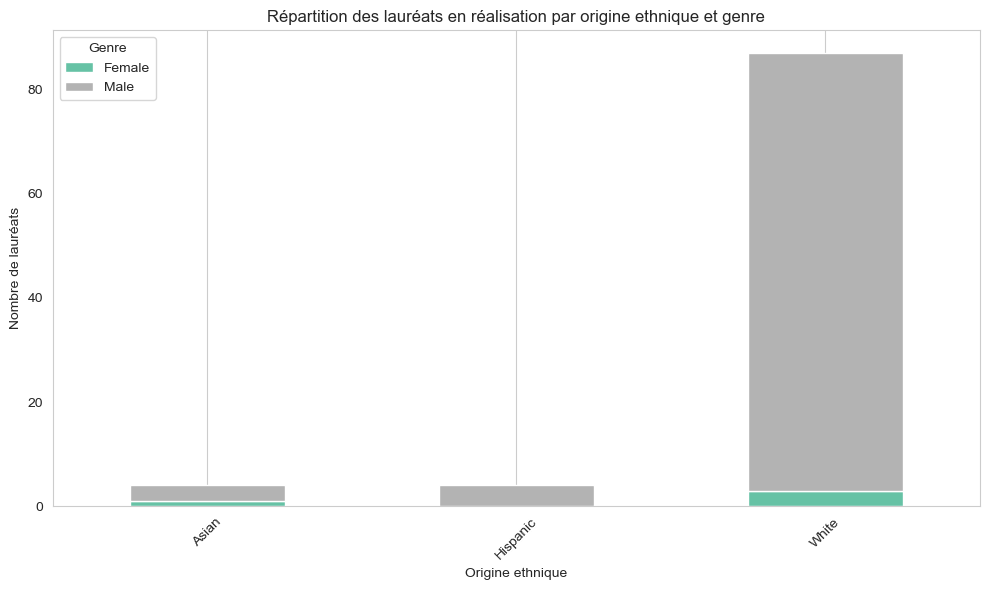

In [46]:
#============== Répartition des réalisateurs lauréats par genre et origine ethnique  ================

# Filtrer les lauréats dans la catégorie Directing
winners_directing = filtered_clean[
    (filtered_clean['canon_category'] == 'DIRECTING') &
    (filtered_clean['winner'] == True)
].copy()

# Regrouper par race et genre
grouped_directing = winners_directing.groupby(['race', 'gender']).size().unstack(fill_value=0)

#------------- Graphique N°10:Répartition des réalisateurs lauréats par genre et origine ethnique.

grouped_directing.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')
plt.title("Répartition des lauréats en réalisation par origine ethnique et genre")
plt.xlabel("Origine ethnique")
plt.ylabel("Nombre de lauréats")
plt.xticks(rotation=45)
plt.legend(title='Genre')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

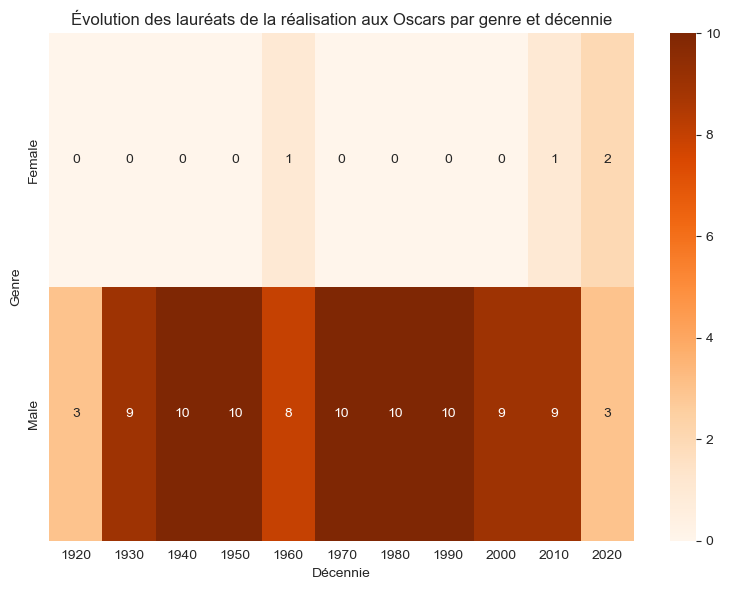

In [47]:
#=============== Évolution des lauréats de la réalisation aux Oscars par genre et décennie ===================

# Comptage genre/décennie pour la réalisation
heatmap_data = (
    filtered_clean[
        (filtered_clean['canon_category'] == 'DIRECTING') & 
        (filtered_clean['winner'] == True)
    ]
    .groupby(['decade', 'gender'])
    .size()
    .unstack(fill_value=0)
)

# Graphique N°11: Évolution des lauréats de la réalisation aux Oscars par genre et décennie
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data.T, annot=True, fmt='d', cmap='Oranges')
plt.title("Évolution des lauréats de la réalisation aux Oscars par genre et décennie")
plt.xlabel("Décennie")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

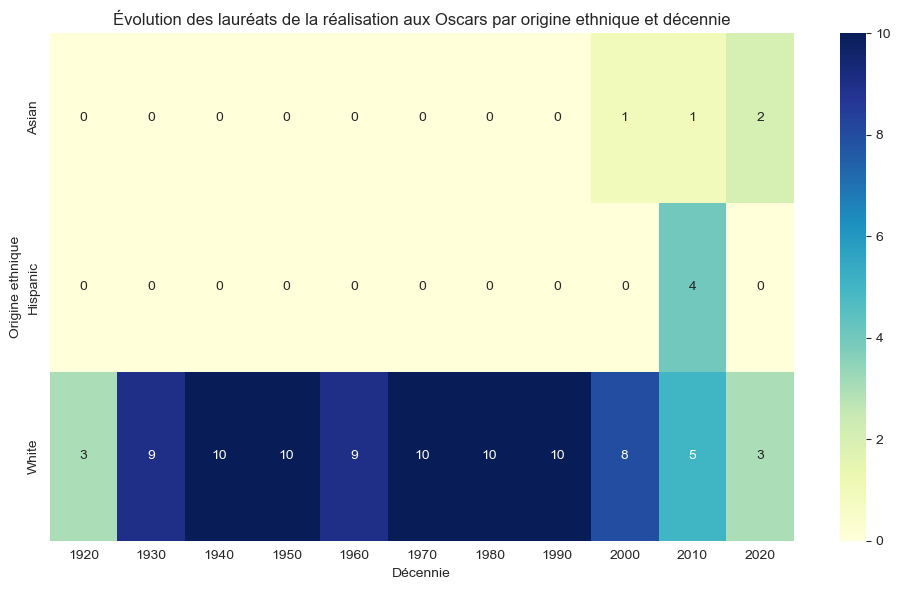

In [48]:
#=========== Évolution des lauréats de la réalisation aux Oscars par origine ethnique et décennie: ==============

# Comptage race/décennie pour la réalisation
heatmap_data = (
    filtered_clean[
        (filtered_clean['canon_category'] == 'DIRECTING') & 
        (filtered_clean['winner'] == True) &
        (filtered_clean['race'].notna())
    ]
    .copy()
)

# Regroupement pour la heatmap
heatmap_data = (
    heatmap_data
    .groupby(['decade', 'race'])
    .size()
    .unstack(fill_value=0)
)

# Graphique N°11-1 : Évolution des lauréats de la réalisation aux Oscars par origine ethnique et décennie
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data.T, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Évolution des lauréats de la réalisation aux Oscars par origine ethnique et décennie")
plt.xlabel("Décennie")
plt.ylabel("Origine ethnique")
plt.tight_layout()
plt.show()

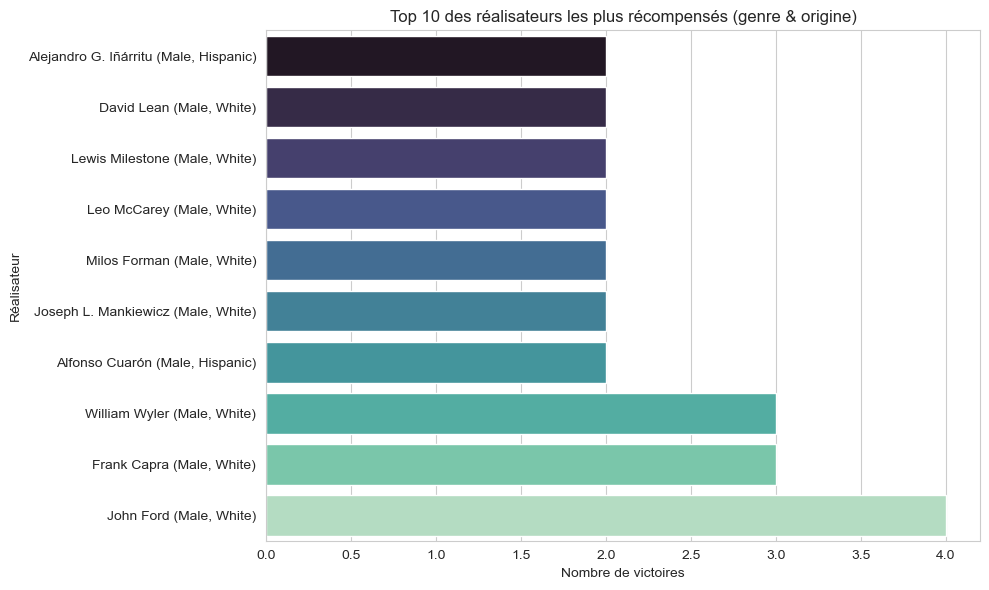

In [49]:
#======================  RÉALISATEURS LES PLUS RÉCOMPENSÉS : GENRE & ORIGINE  =====================

# Filtrer les gagnants dans la catégorie DIRECTING
directing_winners = filtered_clean[
    (filtered_clean['winner'] == True) & 
    (filtered_clean['canon_category'] == 'DIRECTING')
].copy()

# Vérification des colonnes pour s'assurer du nom correct
# print(directing_winners.columns)

# Top 10 des réalisateurs les plus récompensés
top_directors = directing_winners.groupby('name').size().sort_values(ascending=False).head(10)

# Récupérer genre et origine ethnique
top_infos = directing_winners[
    directing_winners['name'].isin(top_directors.index)
][['name', 'gender', 'race']].drop_duplicates()

# Fusionner les infos
top_df = top_directors.reset_index().merge(top_infos, on='name')
top_df.columns = ['name', 'total_wins', 'gender', 'race']

# Créer une étiquette combinée
top_df['label'] = top_df['name'] + ' (' + top_df['gender'] + ', ' + top_df['race'] + ')'

# Trier pour l'affichage
top_df_sorted = top_df.sort_values('total_wins', ascending=True)

#------------- Graphique N°12 : Top 10 des réalisateurs les plus récompensés par genre et origine ethnique.

plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_df_sorted,
    x='total_wins',
    y='label',
    palette='mako',
    hue='label', 
    legend=False
)
plt.title("Top 10 des réalisateurs les plus récompensés (genre & origine)")
plt.xlabel("Nombre de victoires")
plt.ylabel("Réalisateur")
plt.tight_layout()
plt.show()

### Analyse de la catégorie **"ACTOR IN A LEADING ROLE"** : les Acteurs Principaux

----- Répartition ethnique des nominations (ACTOR IN A LEADING ROLE) -----
race
White             438
Black              30
Asian               8
Hispanic            4
Middle Eastern      1
Name: count, dtype: int64

----- Fréquence (%) -----
race
White             91.06
Black              6.24
Asian              1.66
Hispanic           0.83
Middle Eastern     0.21
Name: proportion, dtype: float64


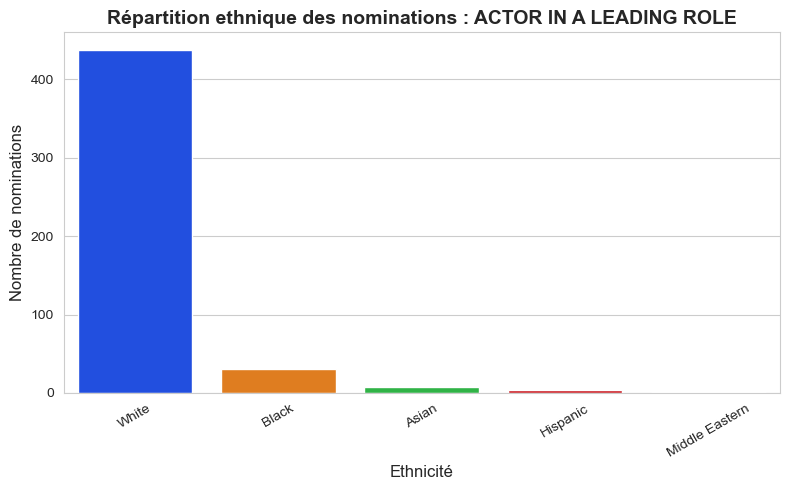

In [51]:
# ===================== ANALYSE ETHNIQUE : ACTOR IN A LEADING ROLE (Nominations) =====================

# Filtrage des rôles principaux masculins
lead_roles = filtered_clean[
    filtered_clean["canon_category"].isin(["ACTOR IN A LEADING ROLE", "ACTRESS IN A LEADING ROLE"])
].copy()

actor_leading = lead_roles[lead_roles["canon_category"] == "ACTOR IN A LEADING ROLE"]

# --- Affichage des statistiques ---
male_nomR_counts = actor_leading["race"].value_counts()
male_nomR_freq = actor_leading["race"].value_counts(normalize=True).mul(100).round(2)

print("----- Répartition ethnique des nominations (ACTOR IN A LEADING ROLE) -----")
print(male_nomR_counts)

print("\n----- Fréquence (%) -----")
print(male_nomR_freq)

#------ Création du graphique ------- (Graphique 13 :)
plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")
sns.barplot(
    x=male_nomR_counts.index,
    y=male_nomR_counts.values,
    palette="bright",
    hue=male_nomR_counts.index, 
    legend=False
)

plt.title("Répartition ethnique des nominations : ACTOR IN A LEADING ROLE", fontsize=14, weight='bold')
plt.ylabel("Nombre de nominations", fontsize=12)
plt.xlabel("Ethnicité", fontsize=12)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

----- Répartition ethnique des gagnants : ACTOR IN A LEADING ROLE -----
race
White             89
Black              5
Asian              3
Hispanic           1
Middle Eastern     1
Name: count, dtype: int64

----- Fréquence (%) -----
race
White             89.90
Black              5.05
Asian              3.03
Hispanic           1.01
Middle Eastern     1.01
Name: proportion, dtype: float64


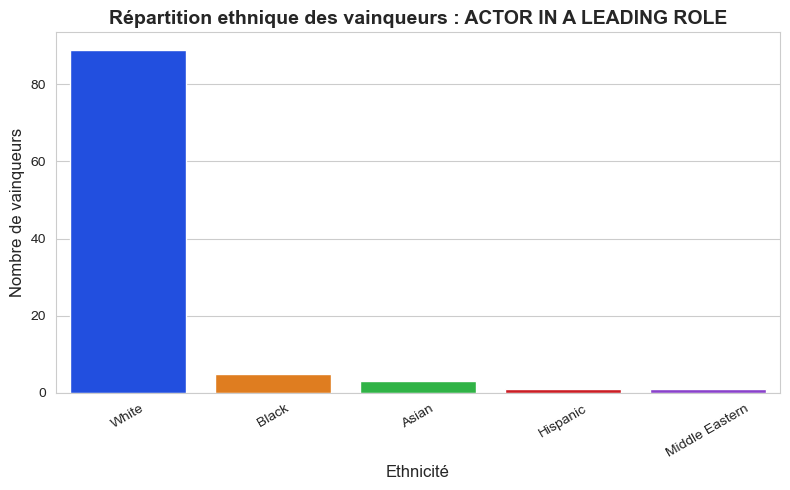

In [52]:
# ===================== ANALYSE ETHNIQUE : ACTOR IN A LEADING ROLE (Gagnants) =====================

# Filtrage des gagnants dans la catégorie ACTOR IN A LEADING ROLE
male_winners = lead_roles[
    (lead_roles["canon_category"] == "ACTOR IN A LEADING ROLE") & 
    (lead_roles["winner"] == True)
]

# --- Affichage des statistiques ---
male_winners_counts = male_winners["race"].value_counts()
male_winners_freq = male_winners["race"].value_counts(normalize=True).mul(100).round(2)

print("----- Répartition ethnique des gagnants : ACTOR IN A LEADING ROLE -----")
print(male_winners_counts)

print("\n----- Fréquence (%) -----")
print(male_winners_freq)

#------ Création du graphique ------- (Graphique 14 :)
plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")
sns.barplot(
    x=male_winners_counts.index,
    y=male_winners_counts.values,
    palette="bright",
    hue=male_winners_counts.index, 
    legend=False
)

plt.title("Répartition ethnique des vainqueurs : ACTOR IN A LEADING ROLE", fontsize=14, weight='bold')
plt.ylabel("Nombre de vainqueurs", fontsize=12)
plt.xlabel("Ethnicité", fontsize=12)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

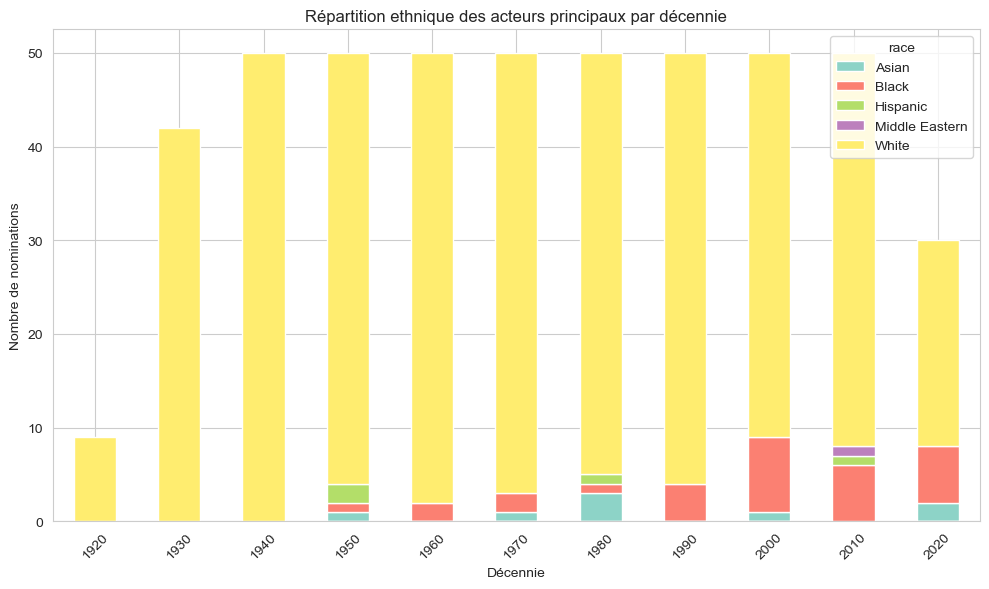

In [53]:
# =================== ÉVOLUTION PAR DÉCENNIE : ACTEURS PRINCIPAUX (Nominations)====================

# Groupement par décennie et origine ethnique
male_by_decade = actor_leading.groupby(["decade","race"]).size().unstack(fill_value=0)

#------ Création du graphique ------- (Graphique 15 :)

male_by_decade.plot(kind="bar", stacked=True, figsize=(10,6), colormap="Set3")
plt.title("Répartition ethnique des acteurs principaux par décennie")
plt.ylabel("Nombre de nominations")
plt.xlabel("Décennie")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

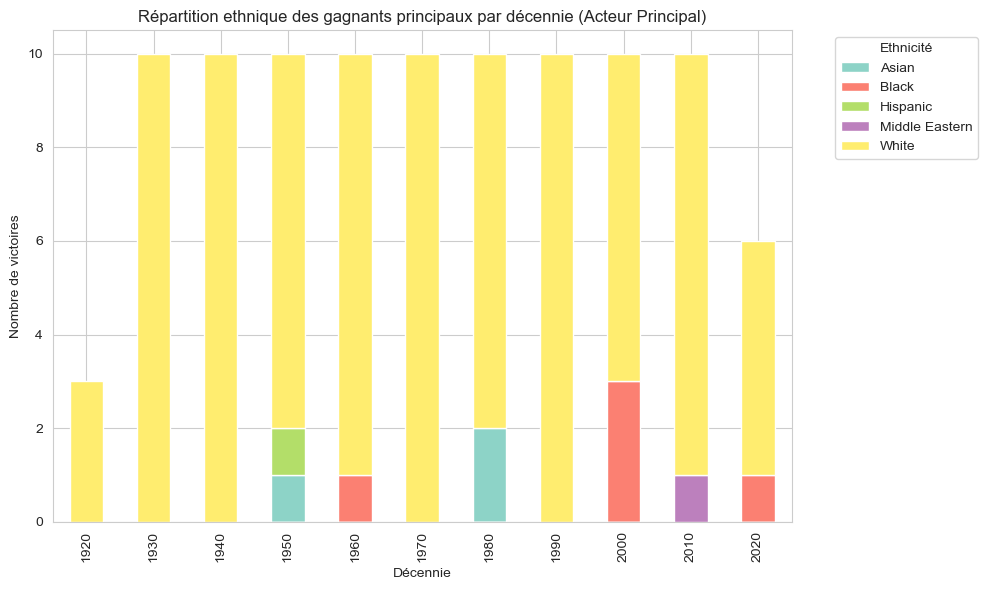

In [54]:
# ============== ÉVOLUTION DES GAINS PAR DÉCENNIE : ACTEURS PRINCIPAUX ==============

# Filtrer uniquement les gagnants parmi les acteurs principaux
actor_winners = actor_leading[actor_leading["winner"] == True]

# Regrouper par décennie et ethnicité
decade_race_wins = actor_winners.groupby(["decade", "race"]).size().unstack(fill_value=0)

#------ Création du graphique ------- (Graphique 16 :)

decade_race_wins.plot(
    kind="bar", 
    stacked=True, 
    figsize=(10, 6), 
    colormap="Set3"
)
plt.title("Répartition ethnique des gagnants principaux par décennie (Acteur Principal)")
plt.xlabel("Décennie")
plt.ylabel("Nombre de victoires")
plt.legend(title="Ethnicité", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [55]:
# ===================== HISTORIQUE DES GAGNANTS NON-BLANCS (ACTEUR PRINCIPAL) =====================

# Filtrer les gagnants non-blancs
non_white_male_winners = actor_winners[actor_winners["race"] != "White"]

# Sélectionner les colonnes pertinentes et trier par année
non_white_male_winners_display = non_white_male_winners[
    ["year_ceremony", "name", "film", "race"]
].sort_values(by="year_ceremony")

# Affichage du tableau des gagnants non-blancs
display(non_white_male_winners_display)

,year_ceremony,name,film,race
615,1951,José Ferrer,Cyrano de Bergerac,Hispanic
818,1957,Yul Brynner,The King and I,Asian
1037,1964,Sidney Poitier,Lilies of the Field,Black
1617,1983,Ben Kingsley,Gandhi,Asian
1681,1985,F. Murray Abraham,Amadeus,Asian
2227,2002,Denzel Washington,Training Day,Black
2329,2005,Jamie Foxx,Ray,Black
2395,2007,Forest Whitaker,The Last King of Scotland,Black
2794,2019,Rami Malek,Bohemian Rhapsody,Middle Eastern
2904,2022,Will Smith,King Richard,Black


### Analyse de la catégorie **"ACTRESS IN A LEADING ROLE"** : les Actrices Principales

----- Répartition ethnique des nominations (ACTRESS IN A LEADING ROLE) -----
race
White         464
Black          15
Asian           2
Hispanic        2
Indigenous      1
Name: count, dtype: int64

----- Fréquence (%) -----
race
White         95.87
Black          3.10
Asian          0.41
Hispanic       0.41
Indigenous     0.21
Name: proportion, dtype: float64


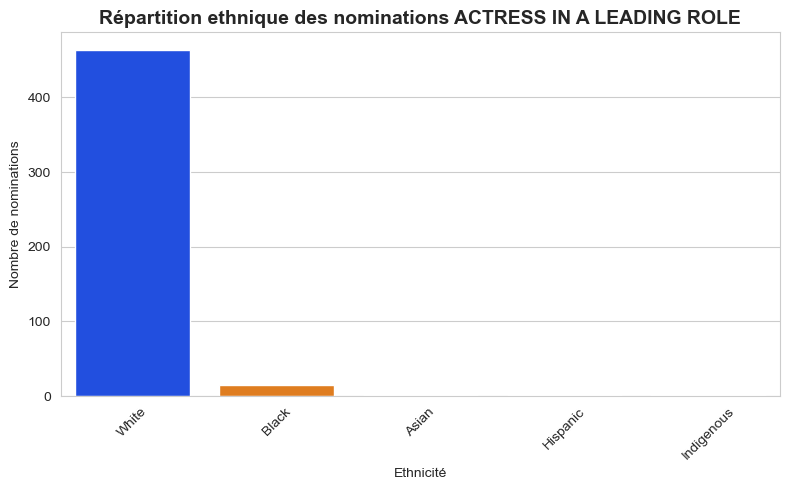

In [57]:
# ===================== ANALYSE ETHNIQUE : ACTRESS IN A LEADING ROLE (Nominations) =====================

# Filtrer uniquement des actrices principales 
female_leads = lead_roles[lead_roles["canon_category"]== "ACTRESS IN A LEADING ROLE"]

# --- Affichage des statistiques ---

female_nomR_counts = female_leads["race"].value_counts()
female_nomR_freq = female_leads["race"].value_counts(normalize=True).mul(100).round(2)

print("----- Répartition ethnique des nominations (ACTRESS IN A LEADING ROLE) -----")
print(female_nomR_counts)

print("\n----- Fréquence (%) -----")
print(female_nomR_freq)

#------ Création du graphique ------- (Graphique 17:)

plt.figure(figsize=(8, 5))
sns.barplot(
    x=female_nomR_counts.index,
    y=female_nomR_counts.values,
    palette="bright",
    hue=female_nomR_counts.index,
    legend=False
)
plt.title("Répartition ethnique des nominations ACTRESS IN A LEADING ROLE", fontsize=14,weight='bold' )
plt.ylabel("Nombre de nominations")
plt.xlabel("Ethnicité")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

----- Répartition ethnique des gagnantes : ACTRESS IN A LEADING ROLE -----
race
White    98
Black     1
Asian     1
Name: count, dtype: int64

----- Fréquence (%) -----
race
White    98.0
Black     1.0
Asian     1.0
Name: proportion, dtype: float64


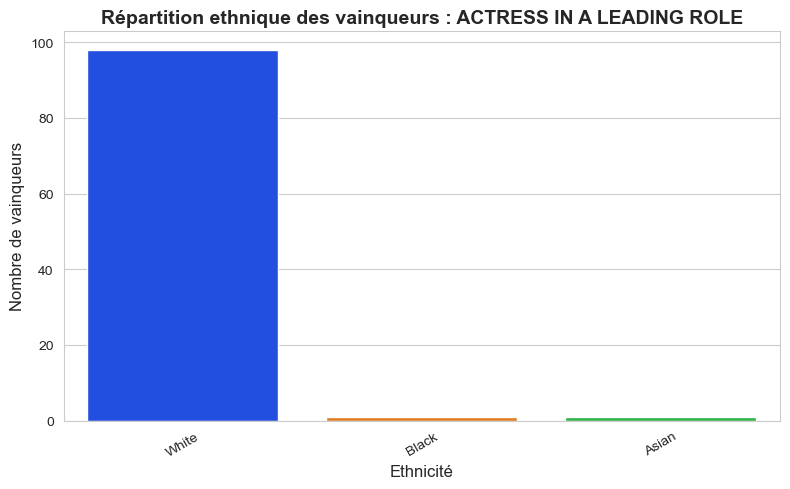

In [58]:
# ===================== ANALYSE ETHNIQUE : ACTRESS IN A LEADING ROLE (Gagnantes) =====================

# Filtrage des gagnants dans la catégorie ACTOR IN A LEADING ROLE
female_winners = lead_roles[
    (lead_roles["canon_category"] == "ACTRESS IN A LEADING ROLE") & 
    (lead_roles["winner"] == True)
]

# --- Affichage des statistiques ---
female_winners_counts = female_winners["race"].value_counts()
female_winners_freq = female_winners["race"].value_counts(normalize=True).mul(100).round(2)

print("----- Répartition ethnique des gagnantes : ACTRESS IN A LEADING ROLE -----")
print(female_winners_counts)

print("\n----- Fréquence (%) -----")
print(female_winners_freq)

#------ Création du graphique ------- (Graphique 18 :)
plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")
sns.barplot(
    x=female_winners_counts.index,
    y=female_winners_counts.values,
    palette="bright",
    hue=female_winners_counts.index, 
    legend=False
)

plt.title("Répartition ethnique des vainqueurs : ACTRESS IN A LEADING ROLE", fontsize=14, weight='bold')
plt.ylabel("Nombre de vainqueurs", fontsize=12)
plt.xlabel("Ethnicité", fontsize=12)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

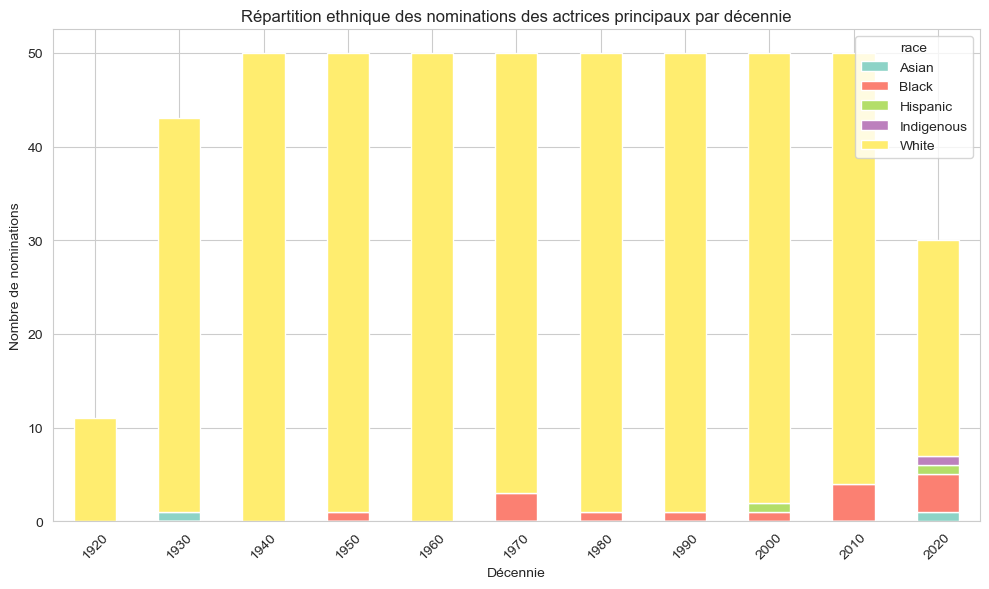

In [59]:
# ===================  ÉVOLUTION PAR DÉCENNIE : ACTRICES PRINCIPALES (Nominations) ==================

# Groupement par décennie et origine ethnique
femaleNom_by_decade = female_leads.groupby(["decade","race"]).size().unstack(fill_value=0)


#------ Création du graphique ------- (Graphique 19 :)
femaleNom_by_decade.plot(kind="bar", stacked=True, figsize=(10,6), colormap="Set3")
plt.title("Répartition ethnique des nominations des actrices principaux par décennie")
plt.ylabel("Nombre de nominations")
plt.xlabel("Décennie")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

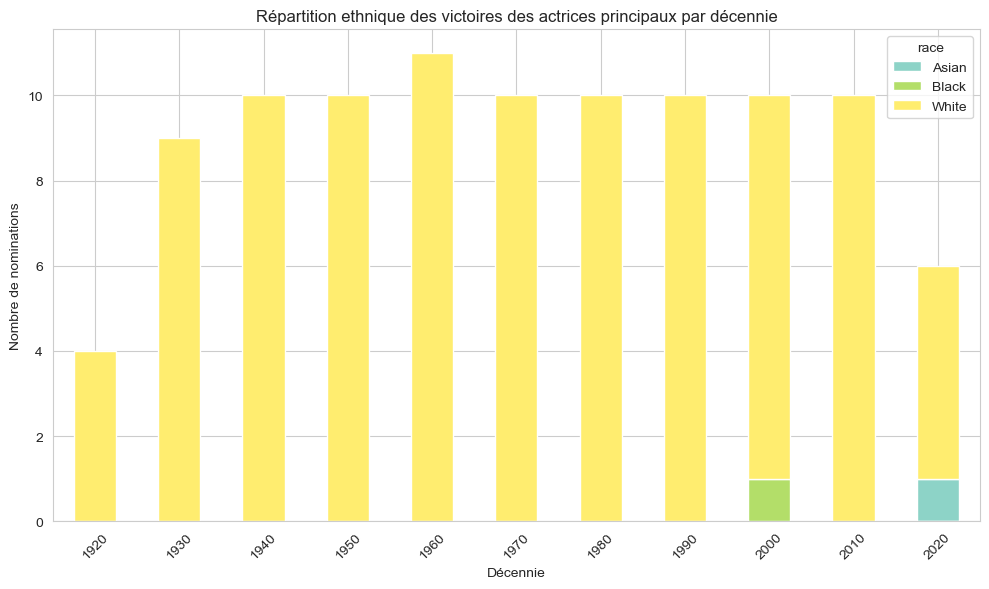

In [60]:
# ============== ÉVOLUTION DES GAINS PAR DÉCENNIE : ACTRICES PRINCIPALES ==============

# Regrouper par décennie et ethnicité
female_wins_by_decade = female_winners.groupby(["decade","race"]).size().unstack(fill_value=0)

#------ Création du graphique ------- (Graphique 20 :)
female_wins_by_decade.plot(kind="bar", stacked=True, figsize=(10,6), colormap="Set3")
plt.title("Répartition ethnique des victoires des actrices principaux par décennie")
plt.ylabel("Nombre de nominations")
plt.xlabel("Décennie")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [61]:
# ===================== HISTORIQUE DES GAGNANTES NON-BLANCHES (ACTRICE PRINCIPALE) =====================

# Filtrer les gagnantes non-blanches
non_white_female_winners= female_winners[female_winners["race"]!="White"]

# Sélectionner les colonnes pertinentes et trier par année
non_white_female_winners_display = non_white_female_winners[["year_ceremony", "name", "film", "race"]].sort_values(by="year_ceremony")

# Affichage du tableau des gagnantes non-blanches
display(non_white_female_winners_display)

,year_ceremony,name,film,race
2234,2002,Halle Berry,Monster's Ball,Black
2949,2023,Michelle Yeoh,Everything Everywhere All at Once,Asian


### Analyse de la catégorie **"ACTOR/ACTRESS IN A SUPPORTING ROLE"** : les Acteurs/Actrices en Role Secondaire

In [63]:
#Pour l'analyse du genre dans la catégorie supporting role 
#--> Il n'y a rien à analyser puisqu'il s'agit d'une catégorie genrée à savoir il y a autant de femmes gagnantes que d'hommes gagnants

In [64]:
#Nous avons commencé en premier par filtrer les éléments sur lesquels nous allon travailler, à savoir, les supporting roles (actors et actresses)
#Cela en créant un nouveau dataframe filtré intitulé supporting_roles
supporting_roles = filtered_clean[
    filtered_clean['canon_category'].isin(['ACTOR IN A SUPPORTING ROLE', 'ACTRESS IN A SUPPORTING ROLE'])
]

supporting_roles

,year_ceremony,category,canon_category,name,film,winner,race,gender,decade
160,1937,ACTOR IN A SUPPORTING ROLE,ACTOR IN A SUPPORTING ROLE,Mischa Auer,My Man Godfrey,False,White,Male,1930
161,1937,ACTOR IN A SUPPORTING ROLE,ACTOR IN A SUPPORTING ROLE,Walter Brennan,Come and Get It,True,White,Male,1930
162,1937,ACTOR IN A SUPPORTING ROLE,ACTOR IN A SUPPORTING ROLE,Stuart Erwin,Pigskin Parade,False,White,Male,1930
163,1937,ACTOR IN A SUPPORTING ROLE,ACTOR IN A SUPPORTING ROLE,Basil Rathbone,Romeo and Juliet,False,White,Male,1930
164,1937,ACTOR IN A SUPPORTING ROLE,ACTOR IN A SUPPORTING ROLE,Akim Tamiroff,The General Died at Dawn,False,White,Male,1930
...,...,...,...,...,...,...,...,...,...
3022,2025,ACTRESS IN A SUPPORTING ROLE,ACTRESS IN A SUPPORTING ROLE,Monica Barbaro,A Complete Unknown,False,White,Female,2020
3023,2025,ACTRESS IN A SUPPORTING ROLE,ACTRESS IN A SUPPORTING ROLE,Ariana Grande,Wicked,False,White,Female,2020
3024,2025,ACTRESS IN A SUPPORTING ROLE,ACTRESS IN A SUPPORTING ROLE,Felicity Jones,The Brutalist,False,White,Female,2020
3025,2025,ACTRESS IN A SUPPORTING ROLE,ACTRESS IN A SUPPORTING ROLE,Isabella Rossellini,Conclave,False,White,Female,2020


In [65]:
# Statistiques descriptives sur la répartition par race pour les Supporting Roles
def race_stats_by_category_for_supporting_roles(data, category_name):
    # Séparer les nominations et les gains
    nominations = data[data['winner'] == False]  # Nominations (sans gagnants)
    wins = data[data['winner'] == True]  # Gains (avec gagnants)
    
    # Statistiques sur les nominations
    race_counts_nominations = nominations['race'].value_counts()
    total_nominations = len(nominations)
    race_percentage_nominations = (race_counts_nominations / total_nominations) * 100
    
    # Statistiques sur les gains
    race_counts_wins = wins['race'].value_counts()
    total_wins = len(wins)
    race_percentage_wins = (race_counts_wins / total_wins) * 100
    
    # Affichage des statistiques
    print(f"\nStatistiques sur l'ethnicité – {category_name} (Nominations)")
    print(f"Nombre total de nominations : {total_nominations}")
    
    for race, count in race_counts_nominations.items():
        print(f"{race}: {count} ({race_percentage_nominations[race]:.1f}%)")
    
    print(f"\nStatistiques sur l'ethnicité – {category_name} (Gains)")
    print(f"Nombre total de gains : {total_wins}")
    
    for race, count in race_counts_wins.items():
        print(f"{race}: {count} ({race_percentage_wins[race]:.1f}%)")

# Statistiques pour les acteurs (Supporting Role)
race_stats_by_category_for_supporting_roles(supporting_roles[supporting_roles['canon_category'] == 'ACTOR IN A SUPPORTING ROLE'], "Acteurs")

# Statistiques pour les actrices (Supporting Role)
race_stats_by_category_for_supporting_roles(supporting_roles[supporting_roles['canon_category'] == 'ACTRESS IN A SUPPORTING ROLE'], "Actrices")



Statistiques sur l'ethnicité – Acteurs (Nominations)
Nombre total de nominations : 356
White: 330 (92.7%)
Black: 17 (4.8%)
Asian: 7 (2.0%)
Hispanic: 2 (0.6%)

Statistiques sur l'ethnicité – Acteurs (Gains)
Nombre total de gains : 89
White: 80 (89.9%)
Black: 7 (7.9%)
Asian: 2 (2.2%)

Statistiques sur l'ethnicité – Actrices (Nominations)
Nombre total de nominations : 356
White: 330 (92.7%)
Black: 19 (5.3%)
Asian: 4 (1.1%)
Hispanic: 3 (0.8%)

Statistiques sur l'ethnicité – Actrices (Gains)
Nombre total de gains : 89
White: 75 (84.3%)
Black: 9 (10.1%)
Hispanic: 3 (3.4%)
Asian: 2 (2.2%)


In [66]:
#Les nominations selon l'éthnicité, pour les femmes et les hommes ensembles
nominations_by_race = supporting_roles['race'].value_counts().sort_values(ascending=False)

print("Nominations by Race:")
print(nominations_by_race)

Nominations by Race:
race
White       815
Black        52
Asian        15
Hispanic      8
Name: count, dtype: int64


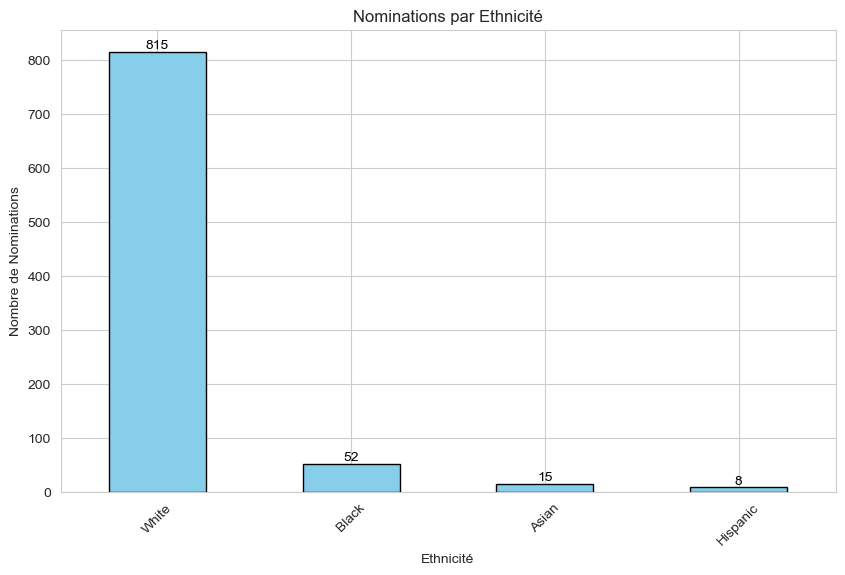

In [67]:
# Visualisation graphique (Bar chart Vertical) (Graphique 21)
plt.figure(figsize=(10, 6))
ax = nominations_by_race.plot(kind='bar', color='skyblue', edgecolor='black')
ax.bar_label(ax.containers[0], label_type='edge', color='black')  # 'edge' places labels on top of the bars
plt.title('Nominations par Ethnicité')
plt.xlabel('Ethnicité')
plt.ylabel('Nombre de Nominations')
plt.xticks(rotation=45)
plt.show()

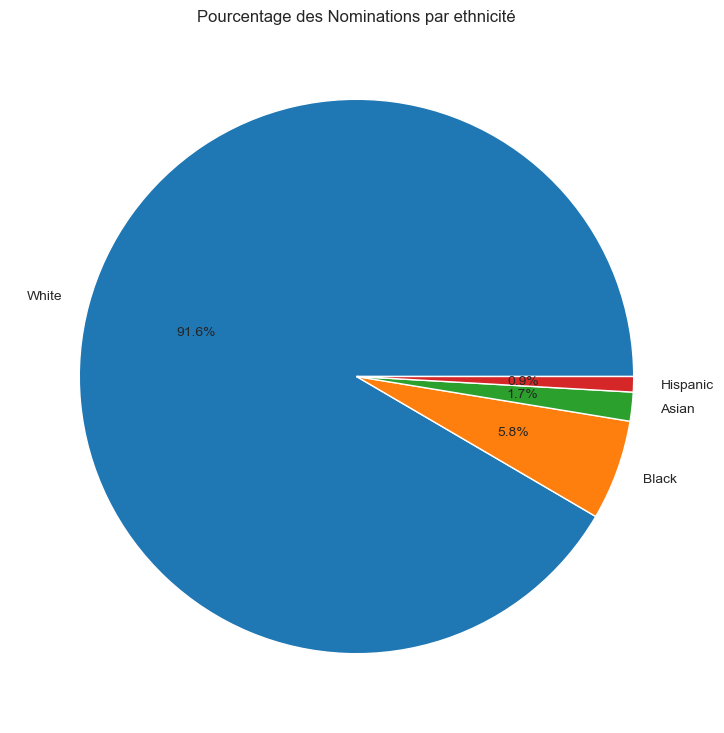

In [68]:
# Pour montrer les proportions de ces nominations (Graphique 22)
plt.figure(figsize=(9, 9))
nominations_by_race.plot(kind='pie', autopct='%1.1f%%', legend=False)
plt.title('Pourcentage des Nominations par ethnicité')
plt.ylabel('')  #Nous avons caché l'axe y'y pour plus de clarté
plt.show()

In [69]:
#Les gains par ethnicité, pour les hommes et les femmes ensembles 
wins_by_race = supporting_roles[supporting_roles['winner'] == True]['race'].value_counts().sort_values(ascending=False)

print("Wins by Race:")
print(wins_by_race)

Wins by Race:
race
White       155
Black        16
Asian         4
Hispanic      3
Name: count, dtype: int64


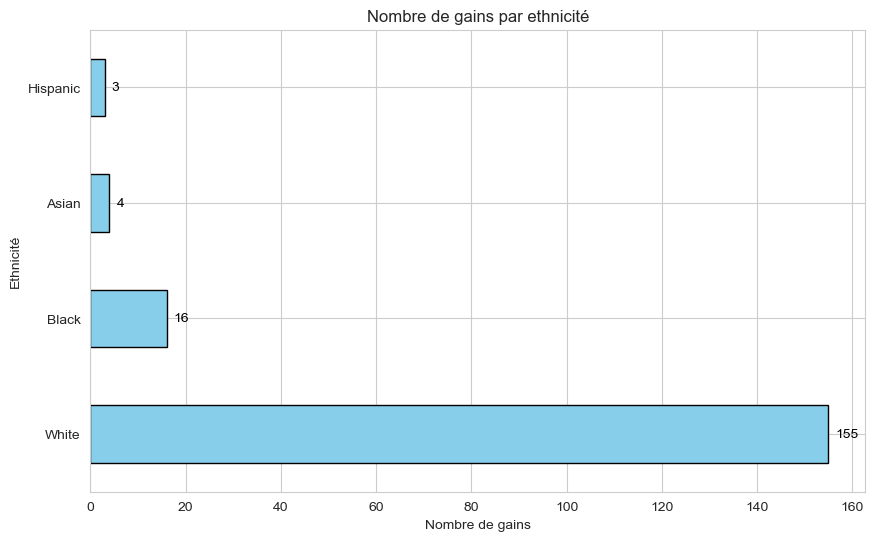

In [70]:
# Visualisation graphiques des nombres de gains par ethnicité, pour les hommes et les femmes ensembles (Graphique 23)
plt.figure(figsize=(10, 6))
ax = wins_by_race.plot(kind='barh', color='skyblue', edgecolor='black')
ax.bar_label(ax.containers[0], label_type='edge', color='black', padding=5)
plt.title('Nombre de gains par ethnicité')
plt.xlabel('Nombre de gains')
plt.ylabel('Ethnicité')
plt.show()

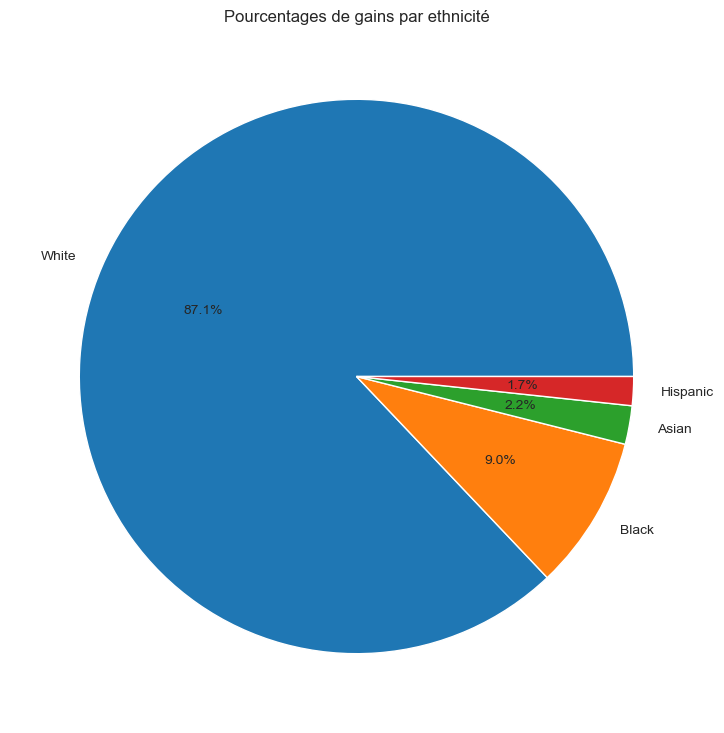

In [71]:
#Les pourcentages de gain par ethnicité (Graphique 24)
plt.figure(figsize=(9, 9))
ax = wins_by_race.plot(kind='pie', autopct='%1.1f%%', legend=False)
plt.title('Pourcentages de gains par ethnicité')
plt.ylabel('') 
plt.show()

In [72]:
#Win rate par ethnicité (Résultat 25)
#Le win rate correspond au rapport entre le nombre de victoires et le nombre total de nominations pour un groupe donné.
#Permet de mesurer la probabilité de gagner une fois nommé, et sert à évaluer l’efficacité d’un groupe dans une compétition, indépendamment de sa fréquence de nomination.
win_rate = (wins_by_race / nominations_by_race).fillna(0).sort_values(ascending=False)
win_rate_percent = (win_rate * 100).round(1)
print("Win Rate by Race:")
print(win_rate_percent)

Win Rate by Race:
race
Hispanic    37.5
Black       30.8
Asian       26.7
White       19.0
Name: count, dtype: float64


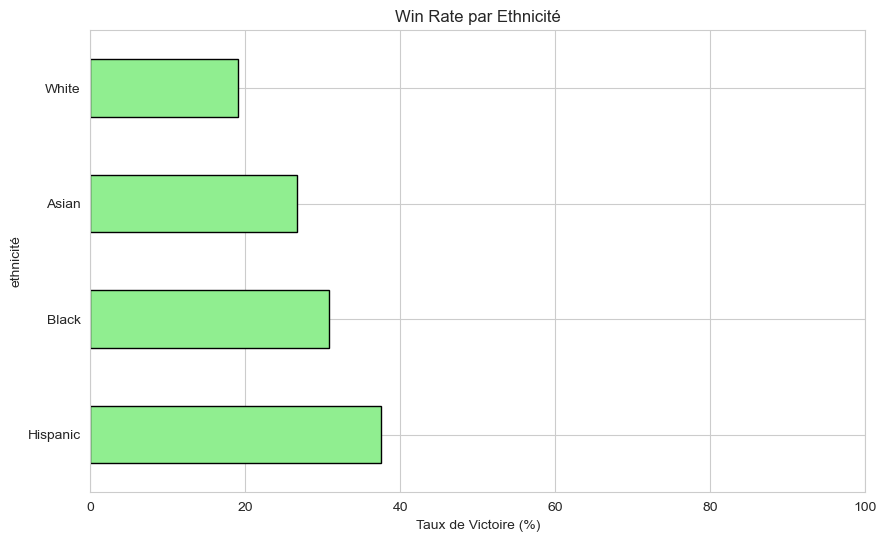

In [73]:
plt.figure(figsize=(10, 6)) #(Graphique 26)
win_rate_percent.plot(kind='barh', color='lightgreen', edgecolor='black')
plt.xlabel('Taux de Victoire (%)')
plt.ylabel('ethnicité')
plt.title('Win Rate par Ethnicité')
plt.xlim(0, 100)  # Car maintenant le taux est en %
plt.show()

In [74]:
# Nous cherchons ici à visualiser une certaine évolution par decennie
#Pour les gains uniquement:
wins_by_decade = supporting_roles[supporting_roles['winner'] == True]\
    .groupby(['decade', 'race']).size().unstack(fill_value=0)
wins_by_decade

race,Asian,Black,Hispanic,White
decade,,,,
1930,0,0,0,6
1940,0,1,0,19
1950,1,0,0,19
1960,0,0,0,20
1970,0,0,0,20
1980,1,1,0,18
1990,0,3,1,16
2000,0,2,0,18
2010,0,7,0,13


In [75]:
#Les nominations par decennie uniquement:
nominations_by_decade = supporting_roles[supporting_roles['winner'] == False]\
    .groupby(['decade', 'race']).size().unstack(fill_value=0)
nominations_by_decade

race,Asian,Black,Hispanic,White
decade,,,,
1930,0,0,0,24
1940,0,0,2,78
1950,1,1,0,78
1960,1,2,1,76
1970,0,1,0,79
1980,1,7,0,72
1990,1,3,1,75
2000,4,10,0,66
2010,1,5,0,74


<Figure size 1000x600 with 0 Axes>

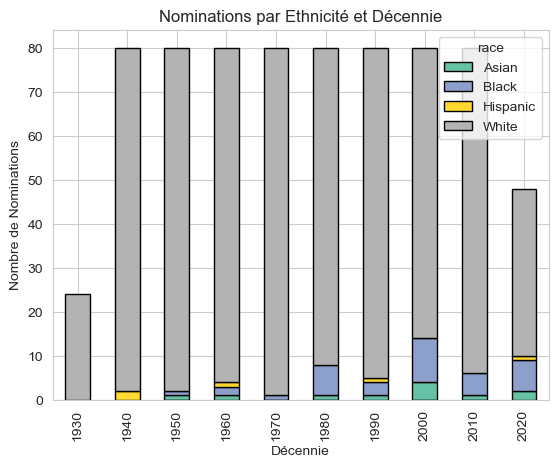

In [76]:
# Visualisation des nominations par décennie et ethnie (empilé) (Graphique 27)
plt.figure(figsize=(10, 6))
nominations_by_decade.plot(kind='bar', stacked=True, cmap='Set2', edgecolor='black')
plt.title('Nominations par Ethnicité et Décennie')
plt.xlabel('Décennie')
plt.ylabel('Nombre de Nominations')
plt.show()

<Figure size 1000x600 with 0 Axes>

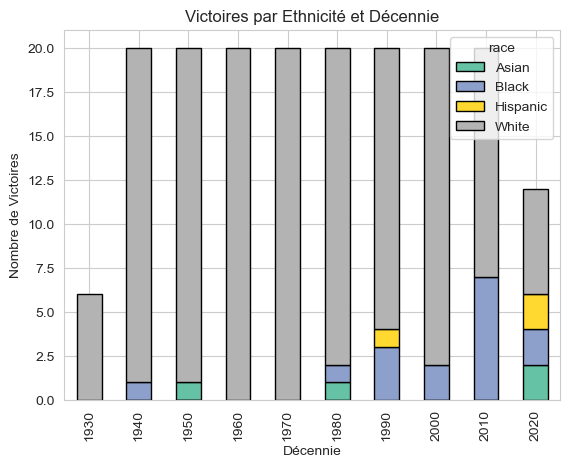

In [77]:
# Visualisation des victoires par décennie et ethnie (empilé) (Graphique 28)
plt.figure(figsize=(10, 6))
wins_by_decade.plot(kind='bar', stacked=True, cmap='Set2', edgecolor='black')
plt.title('Victoires par Ethnicité et Décennie')
plt.xlabel('Décennie')
plt.ylabel('Nombre de Victoires')
plt.show()

## Le croisement des catégories

In [79]:
gender_by_category = filtered_clean[
    filtered_clean['canon_category'].isin([
        'ACTOR IN A SUPPORTING ROLE', 'ACTRESS IN A SUPPORTING ROLE',
        'ACTOR IN A LEADING ROLE', 'ACTRESS IN A LEADING ROLE',
        'DIRECTING', 'WRITING'
    ])
].groupby(['canon_category', 'gender']).size().unstack(fill_value=0)

print(gender_by_category)
#Il y a 2 male dans une catégorie de femmes, donc nous allons vérifier et corriger

gender                        Female  Male
canon_category                            
ACTOR IN A LEADING ROLE            0   481
ACTOR IN A SUPPORTING ROLE         0   445
ACTRESS IN A LEADING ROLE        483     1
ACTRESS IN A SUPPORTING ROLE     445     0
DIRECTING                         13   463
WRITING                           52   561


In [80]:
# Vérifie les genres présents dans chaque canon_category
print(filtered_clean.groupby('canon_category')['gender'].value_counts())

canon_category                gender
ACTOR IN A LEADING ROLE       Male      481
ACTOR IN A SUPPORTING ROLE    Male      445
ACTRESS IN A LEADING ROLE     Female    483
                              Male        1
ACTRESS IN A SUPPORTING ROLE  Female    445
DIRECTING                     Male      463
                              Female     13
WRITING                       Male      561
                              Female     52
Name: count, dtype: int64


In [81]:
#Pour détecter qui sont les intrus
filtered_clean[
    (filtered_clean['canon_category'] == 'ACTRESS IN A LEADING ROLE') &
    (filtered_clean['gender'] == 'Male')
]
#Il y a 2 personnes --> Cas d'Eliott Page (Trans, était femme au tant de la nomination) et Cecile Tyson (faute à corriger)

,year_ceremony,category,canon_category,name,film,winner,race,gender,decade
2440,2008,ACTRESS IN A LEADING ROLE,ACTRESS IN A LEADING ROLE,Elliot Page,Juno,False,White,Male,2000


In [82]:
# Corriger Elliot Page (reclasser comme Female car il était perçu comme femme lors de la nomination)
filtered_clean.loc[
    (filtered_clean['name'].str.contains('Elliot Page|Ellen Page', case=False)) &
    (filtered_clean['canon_category'] == 'ACTRESS IN A LEADING ROLE'),
    'gender'
] = 'Female'

#Verification
filtered_clean.groupby('canon_category')['gender'].value_counts()

canon_category                gender
ACTOR IN A LEADING ROLE       Male      481
ACTOR IN A SUPPORTING ROLE    Male      445
ACTRESS IN A LEADING ROLE     Female    484
ACTRESS IN A SUPPORTING ROLE  Female    445
DIRECTING                     Male      463
                              Female     13
WRITING                       Male      561
                              Female     52
Name: count, dtype: int64

In [83]:
#Nous avons remis le code
gender_by_category = filtered_clean[
    filtered_clean['canon_category'].isin([
        'ACTOR IN A SUPPORTING ROLE', 'ACTRESS IN A SUPPORTING ROLE',
        'ACTOR IN A LEADING ROLE', 'ACTRESS IN A LEADING ROLE',
        'DIRECTING', 'WRITING'
    ])
].groupby(['canon_category', 'gender']).size().unstack(fill_value=0)

print(gender_by_category)

gender                        Female  Male
canon_category                            
ACTOR IN A LEADING ROLE            0   481
ACTOR IN A SUPPORTING ROLE         0   445
ACTRESS IN A LEADING ROLE        484     0
ACTRESS IN A SUPPORTING ROLE     445     0
DIRECTING                         13   463
WRITING                           52   561


In [84]:
#Nous vérifions les éthnicités dans chaque catégorie
race_by_category = filtered_clean[
    filtered_clean['canon_category'].isin([
        'ACTOR IN A SUPPORTING ROLE', 'ACTRESS IN A SUPPORTING ROLE',
        'ACTOR IN A LEADING ROLE', 'ACTRESS IN A LEADING ROLE',
        'DIRECTING', 'WRITING'
    ])
].groupby(['canon_category', 'race']).size().unstack(fill_value=0)

print(race_by_category)

race                          Asian  Black  Hispanic  Indigenous  \
canon_category                                                     
ACTOR IN A LEADING ROLE           8     30         4           0   
ACTOR IN A SUPPORTING ROLE        9     24         2           0   
ACTRESS IN A LEADING ROLE         2     15         2           1   
ACTRESS IN A SUPPORTING ROLE      6     28         6           0   
DIRECTING                        10      6         5           0   
WRITING                           6     11         3           0   

race                          Middle Eastern  Māori  White  
canon_category                                              
ACTOR IN A LEADING ROLE                    1      0    438  
ACTOR IN A SUPPORTING ROLE                 0      0    410  
ACTRESS IN A LEADING ROLE                  0      0    464  
ACTRESS IN A SUPPORTING ROLE               0      0    405  
DIRECTING                                  0      0    455  
WRITING                     

In [85]:
#Intersection entre genre et ethnicité pour chaque catégories
intersection = filtered_clean[
    filtered_clean['canon_category'].isin([
        'ACTOR IN A SUPPORTING ROLE', 'ACTRESS IN A SUPPORTING ROLE',
        'ACTOR IN A LEADING ROLE', 'ACTRESS IN A LEADING ROLE',
        'DIRECTING', 'WRITING'
    ])
].groupby(['canon_category', 'gender', 'race']).size()

print(intersection)

canon_category                gender  race          
ACTOR IN A LEADING ROLE       Male    Asian               8
                                      Black              30
                                      Hispanic            4
                                      Middle Eastern      1
                                      White             438
ACTOR IN A SUPPORTING ROLE    Male    Asian               9
                                      Black              24
                                      Hispanic            2
                                      White             410
ACTRESS IN A LEADING ROLE     Female  Asian               2
                                      Black              15
                                      Hispanic            2
                                      Indigenous          1
                                      White             464
ACTRESS IN A SUPPORTING ROLE  Female  Asian               6
                                      Black    

In [86]:
#Pour les visualisations graphiques

C:\Users\dell\AppData\Local\Temp\ipykernel_17960\4040217380.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crew_roles['role'] = crew_roles['canon_category'].apply(lambda x: 'Director' if 'DIRECTING' in x.upper() else 'Writer')


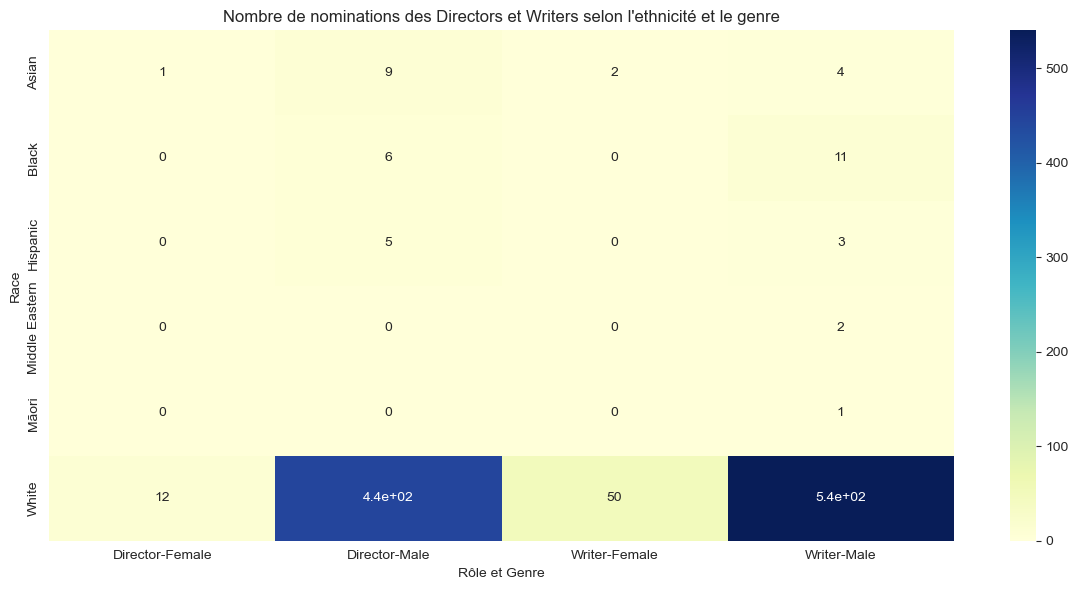

In [87]:
#Un heatmap pour visualiser le nombre de nomination des catégiries non genrées (writers et directors) selon l'éthnicité et le genre (Graphique 29)

# 1. Filtrage pour les directors et writers dans canon_category
crew_roles = filtered_clean[
    (filtered_clean['canon_category'].str.contains('DIRECTING', case=False)) |
    (filtered_clean['canon_category'].str.contains('WRITING', case=False))
]

# 2. Création d'une nouvelle colonne : Director ou Writer
crew_roles['role'] = crew_roles['canon_category'].apply(lambda x: 'Director' if 'DIRECTING' in x.upper() else 'Writer')

# 3. Groupement par rôle, race et genre
grouped = crew_roles.groupby(['role', 'race', 'gender']).size().reset_index(name='count')

# 4. Créationn d'une table pivot avec les nombres
pivot = grouped.pivot_table(index='race', columns=['role', 'gender'], values='count', fill_value=0)

# 5. finalement, heatmap avec les valeurs absolues
plt.figure(figsize=(12, 6))
sns.heatmap(pivot, annot=True, cmap="YlGnBu")
plt.title("Nombre de nominations des Directors et Writers selon l'ethnicité et le genre")
plt.ylabel('Race')
plt.xlabel('Rôle et Genre')
plt.tight_layout()
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_17960\723507686.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lead_roles["role_type"] = "Lead"


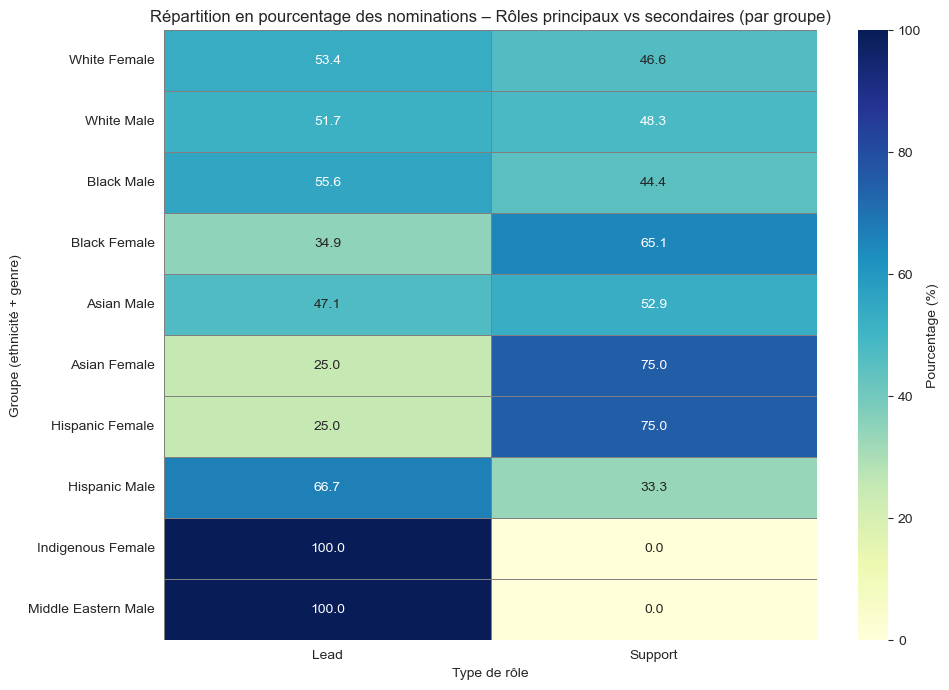

In [88]:
#Un heatmap pour visualuser la répartition en pourcentage des nominations selon l'ethnicité et le genre en comparant entre les rôle principaux et ceux secondaires
#(Graphique 30)

support_roles = filtered_clean[filtered_clean["canon_category"].isin(["ACTOR IN A SUPPORTING ROLE", "ACTRESS IN A SUPPORTING ROLE"])].copy()
lead_roles = filtered_clean[filtered_clean['canon_category'].isin([
    'ACTOR IN A LEADING ROLE',
    'ACTRESS IN A LEADING ROLE'
])]
lead_roles["role_type"] = "Lead"
support_roles["role_type"] = "Support"

# Combiner les support et lead role
combined_roles = pd.concat([lead_roles, support_roles], ignore_index=True)

# Grouper ethnicité et genre (race + gender)
combined_roles["group"] = combined_roles["race"] + " " + combined_roles["gender"]

# Compter les nominations 
counts = combined_roles.groupby(["group", "role_type"]).size().unstack(fill_value=0)

# conversion en pourcentage pour rendre la lecture plus simple
percentages = counts.div(counts.sum(axis=1), axis=0).mul(100).round(1)


sorted_index = counts.sum(axis=1).sort_values(ascending=False).index
percentages = percentages.loc[sorted_index]


plt.figure(figsize=(10, 7))
sns.heatmap(percentages, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=0.5, linecolor='gray', cbar_kws={'label': 'Pourcentage (%)'})

plt.title("Répartition en pourcentage des nominations – Rôles principaux vs secondaires (par groupe)")
plt.xlabel("Type de rôle")
plt.ylabel("Groupe (ethnicité + genre)")
plt.savefig("Répartition en pourcentage des nominations – Rôles principaux vs secondaires (par groupe)", dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

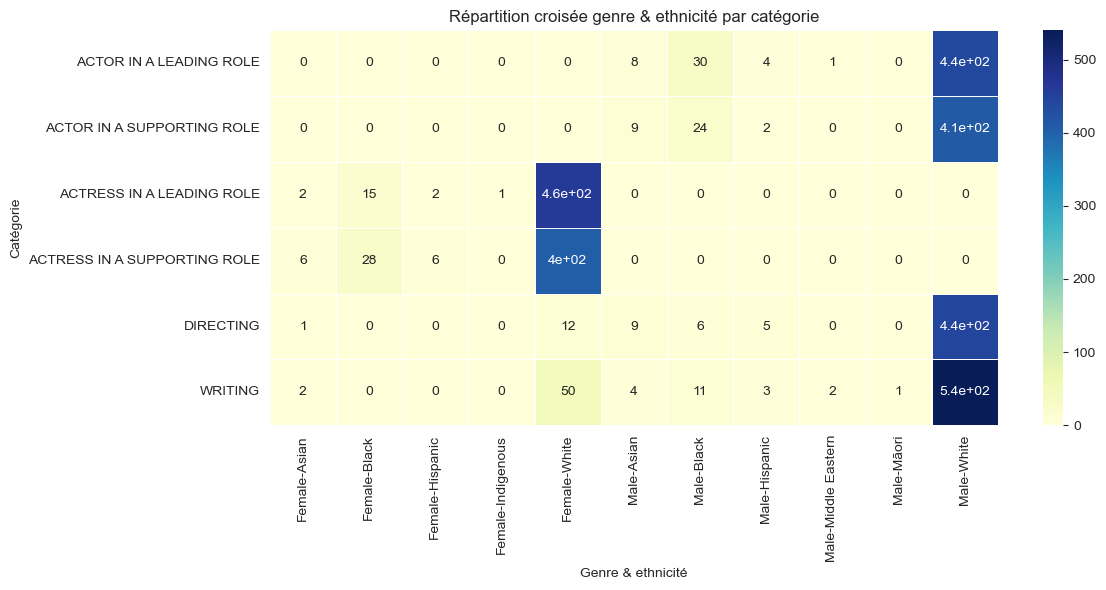

In [89]:
#Un heatmap pour que nous puisssions visualiser la répartition croisée de genre et éthnicité pour toutes les catégories (Graphique 31)
intersection = filtered_clean.groupby(['canon_category', 'gender', 'race']).size().unstack().fillna(0)

intersection = filtered_clean.groupby(['canon_category', 'gender', 'race']).size().reset_index(name='count')
pivot_heatmap = intersection.pivot_table(index='canon_category', columns=['gender', 'race'], values='count', fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_heatmap, annot=True, cmap="YlGnBu", linewidths=0.5)
plt.title("Répartition croisée genre & ethnicité par catégorie")
plt.ylabel("Catégorie")
plt.xlabel("Genre & ethnicité")
plt.tight_layout()
plt.show()

In [90]:
#THE HALL OF FIRSTS - Le tableau des premiers, à savoir les premiers de chauqe genre et ethnicité pour toutes les catégories (Graphique 32)
winners = filtered_clean[filtered_clean['winner'] == True].copy()

# Nous trions les gagnants par année croissante pour avoir les premiers dans chaque catégorie
winners_sorted = winners.sort_values('year_ceremony')

# Nous trions par année pour identifier les premiers
winners_sorted = winners.sort_values('year_ceremony')

# Nous sélectionnons les premiers gagnants par combinaison de catégorie + genre + ethnicité 
first_by_gender_and_race = winners_sorted.drop_duplicates(subset=['canon_category', 'gender', 'race'])

first_by_gender_and_race[['year_ceremony', 'canon_category', 'name', 'gender', 'race']]

,year_ceremony,canon_category,name,gender,race
2,1928,ACTOR IN A LEADING ROLE,Emil Jannings,Male,White
18,1928,WRITING,Ben Hecht,Male,White
11,1928,DIRECTING,Frank Borzage,Male,White
6,1928,ACTRESS IN A LEADING ROLE,Janet Gaynor,Female,White
72,1930,WRITING,Frances Marion,Female,White
161,1937,ACTOR IN A SUPPORTING ROLE,Walter Brennan,Male,White
174,1937,ACTRESS IN A SUPPORTING ROLE,Gale Sondergaard,Female,White
262,1940,ACTRESS IN A SUPPORTING ROLE,Hattie McDaniel,Female,Black
615,1951,ACTOR IN A LEADING ROLE,José Ferrer,Male,Hispanic
818,1957,ACTOR IN A LEADING ROLE,Yul Brynner,Male,Asian


## Les Mouvement Sociaux : 

### #OscarsSoWhite

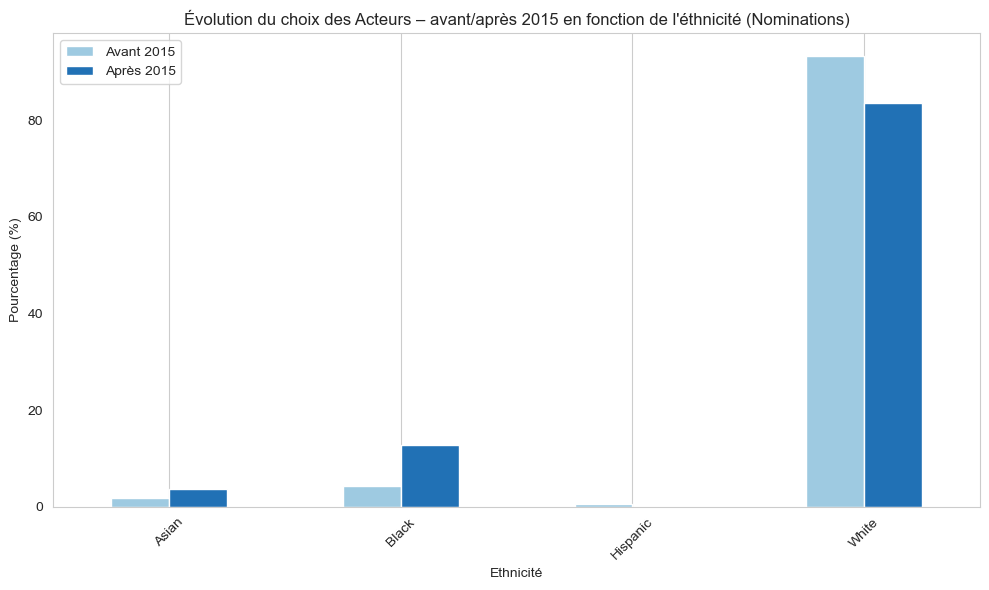

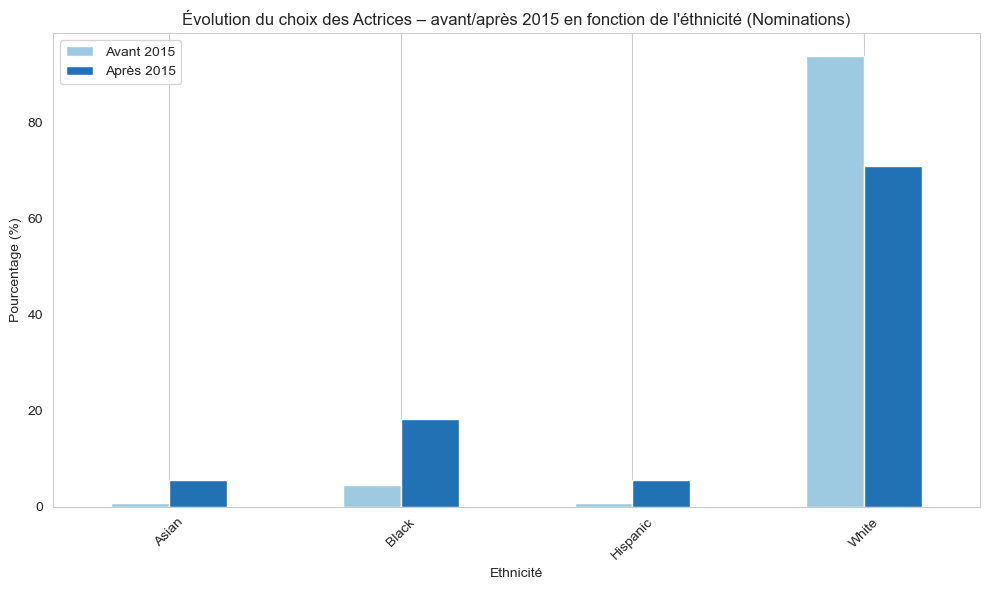

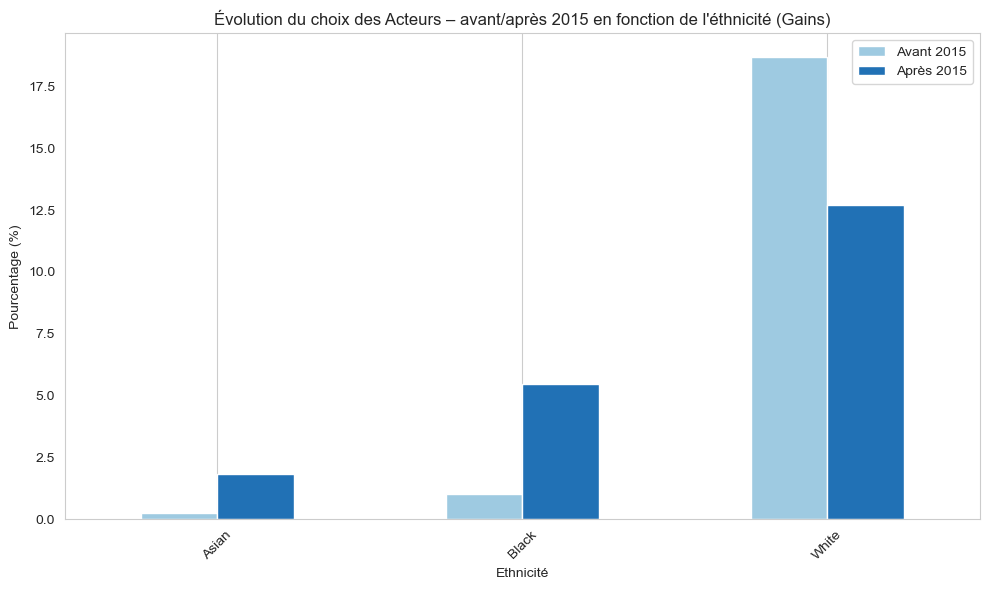

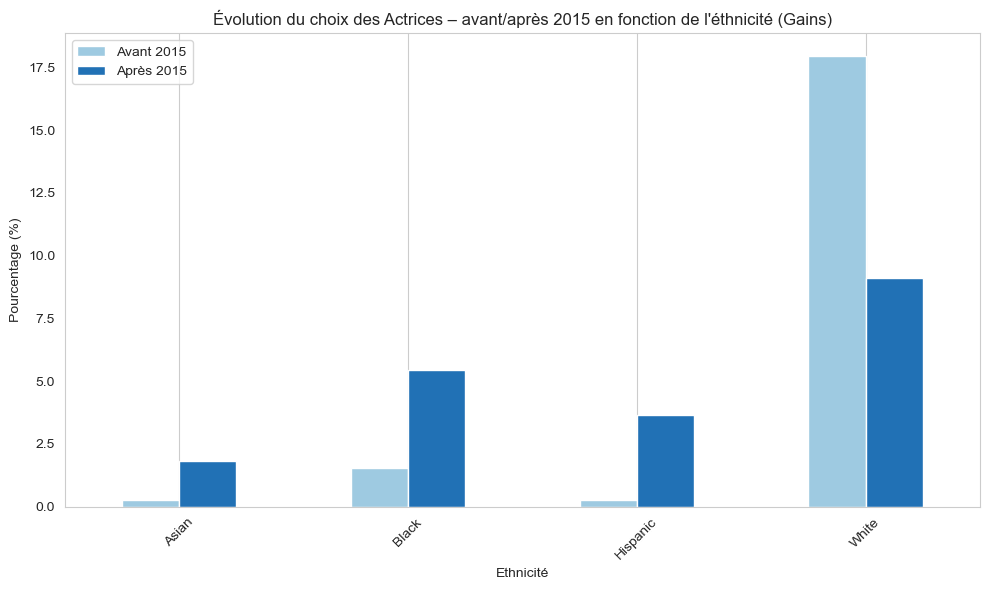

In [93]:
#================= Pour les Roles Secondaires =====================

# Fonction pour analyser l'évolution des nominations et des gains par ethnicité avant et après 2015 (l'année du #OscarsSoWhite) pour les acteurs et les actrices 
def analyze_race_change_before_after(supporting_roles, role_name="Acteurs/Actrices", analysis_type="nominations"):
    # Séparation avant et après 2015
    before = supporting_roles[supporting_roles['year_ceremony'] < 2015]
    after = supporting_roles[supporting_roles['year_ceremony'] >= 2015]

    if analysis_type == "nominations":
        # Groupement par ethnicité et calcul du pourcentage de nominations avant et après 2015
        race_before = before.groupby(['race']).size().div(len(before)).mul(100)
        race_after = after.groupby(['race']).size().div(len(after)).mul(100)
    elif analysis_type == "gains":
        # Groupement par ethnicité et calcul du pourcentage de gains avant et après 2015
        race_before = before[before['winner'] == True].groupby(['race']).size().div(len(before)).mul(100)
        race_after = after[after['winner'] == True].groupby(['race']).size().div(len(after)).mul(100)

    # Création d'un DataFrame pour comparer avant et après
    race_df = pd.DataFrame({'Avant 2015': race_before, 'Après 2015': race_after}).fillna(0)

    # Création du graphique  (Graphique 33 , 34 , 35 , 36 :)
    race_df.plot(kind='bar', figsize=(10, 6), color=['#9ecae1', '#2171b5'])
    plt.title(f"Évolution du choix des {role_name} – avant/après 2015 en fonction de l'éthnicité ({analysis_type.capitalize()})")
    plt.ylabel("Pourcentage (%)")
    plt.xlabel("Ethnicité")
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()
# Utilisation pour les acteurs (nominations) 
analyze_race_change_before_after(supporting_roles[supporting_roles['canon_category'] == 'ACTOR IN A SUPPORTING ROLE'], "Acteurs", "nominations")

# Utilisation pour les actrices (nominations)
analyze_race_change_before_after(supporting_roles[supporting_roles['canon_category'] == 'ACTRESS IN A SUPPORTING ROLE'], "Actrices", "nominations")

# Utilisation pour les acteurs (gains)
analyze_race_change_before_after(supporting_roles[supporting_roles['canon_category'] == 'ACTOR IN A SUPPORTING ROLE'], "Acteurs", "gains")

# Utilisation pour les actrices (gains)
analyze_race_change_before_after(supporting_roles[supporting_roles['canon_category'] == 'ACTRESS IN A SUPPORTING ROLE'], "Actrices", "gains")

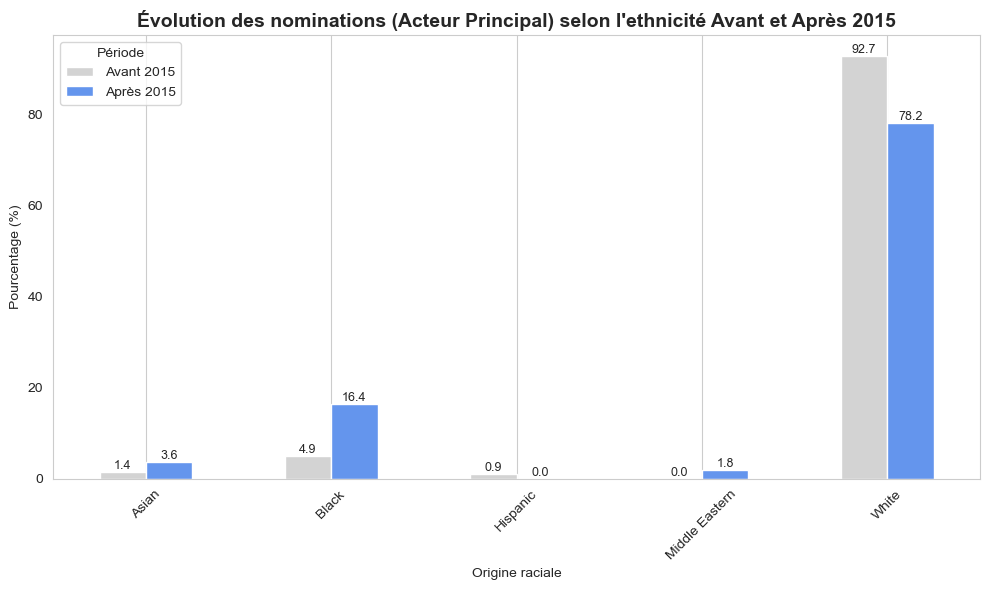

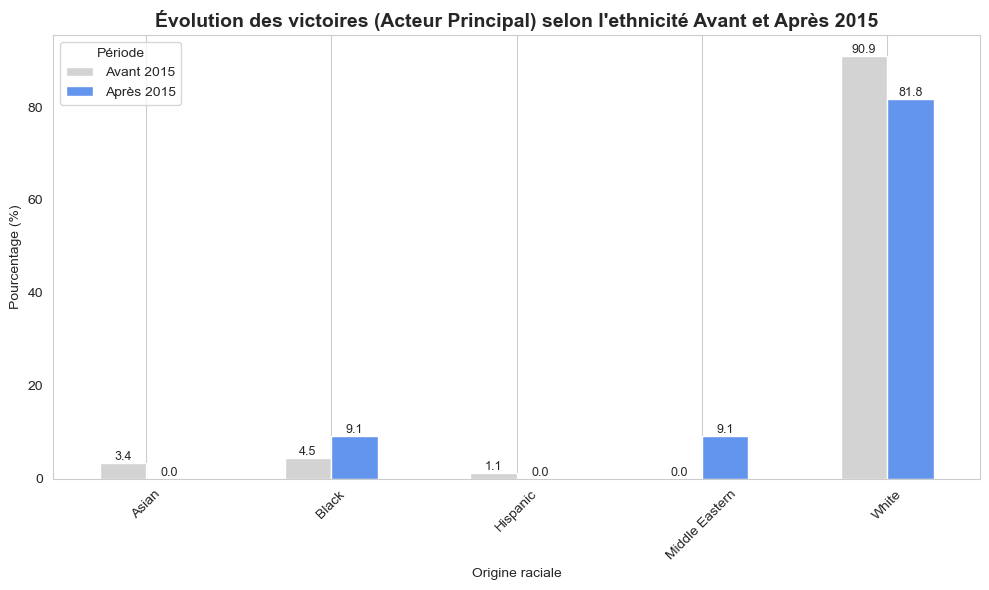

In [94]:
# ===================== ÉVOLUTION DES NOMINATIONS : ACTEUR PRINCIPAL AVANT VS APRÈS 2015 =====================

# Séparer les nominations avant et après 2015
male_pre15 = actor_leading[actor_leading["year_ceremony"] < 2015]
male_post15 = actor_leading[actor_leading["year_ceremony"] >= 2015]

# Calcul des fréquences par origine ethnique 
pre_counts = male_pre15["race"].value_counts(normalize=True).mul(100).round(2)
post_counts = male_post15["race"].value_counts(normalize=True).mul(100).round(2)

# Fusion des données dans un même DataFrame
race_comparison_male_nom = pd.DataFrame({
    "Avant 2015": pre_counts,
    "Après 2015": post_counts
}).fillna(0)

# Création du graphique (Graphique 37 :)
ax1 = race_comparison_male_nom.plot(kind="bar", figsize=(10, 6), color=["lightgray", "cornflowerblue"])
plt.title("Évolution des nominations (Acteur Principal) selon l'ethnicité Avant et Après 2015", fontsize=14, weight='bold')
plt.ylabel("Pourcentage (%)")
plt.xlabel("Origine raciale")
plt.xticks(rotation=45)
plt.legend(title="Période")
plt.grid(axis='y')
for container in ax1.containers:
    ax1.bar_label(container, fmt="%.1f", label_type="edge", fontsize=9)

plt.tight_layout()
plt.show()


# ===================== ÉVOLUTION DES VICTOIRES : ACTEUR PRINCIPAL AVANT VS APRÈS 2015 =====================

# Séparer les gagnants avant et après 2015
maleW_pre15 = male_winners[male_winners["year_ceremony"] < 2015]
maleW_post15 = male_winners[male_winners["year_ceremony"] >= 2015]

# Calcul des fréquences par origine ethnique
pre_mw_counts = maleW_pre15["race"].value_counts(normalize=True).mul(100).round(2)
post_mw_counts = maleW_post15["race"].value_counts(normalize=True).mul(100).round(2)

# Fusion des données dans un même DataFrame
race_comparison_male_win = pd.DataFrame({
    "Avant 2015": pre_mw_counts,
    "Après 2015": post_mw_counts
}).fillna(0)

# Création du graphique (Graphique 38 :)
ax2 = race_comparison_male_win.plot(kind="bar", figsize=(10, 6), color=["lightgray", "cornflowerblue"])
plt.title("Évolution des victoires (Acteur Principal) selon l'ethnicité Avant et Après 2015", fontsize=14, weight='bold')
plt.ylabel("Pourcentage (%)")
plt.xlabel("Origine raciale")
plt.xticks(rotation=45)
plt.legend(title="Période")
plt.grid(axis='y')
for container in ax2.containers:
    ax2.bar_label(container, fmt="%.1f", label_type="edge", fontsize=9)

plt.tight_layout()
plt.show()


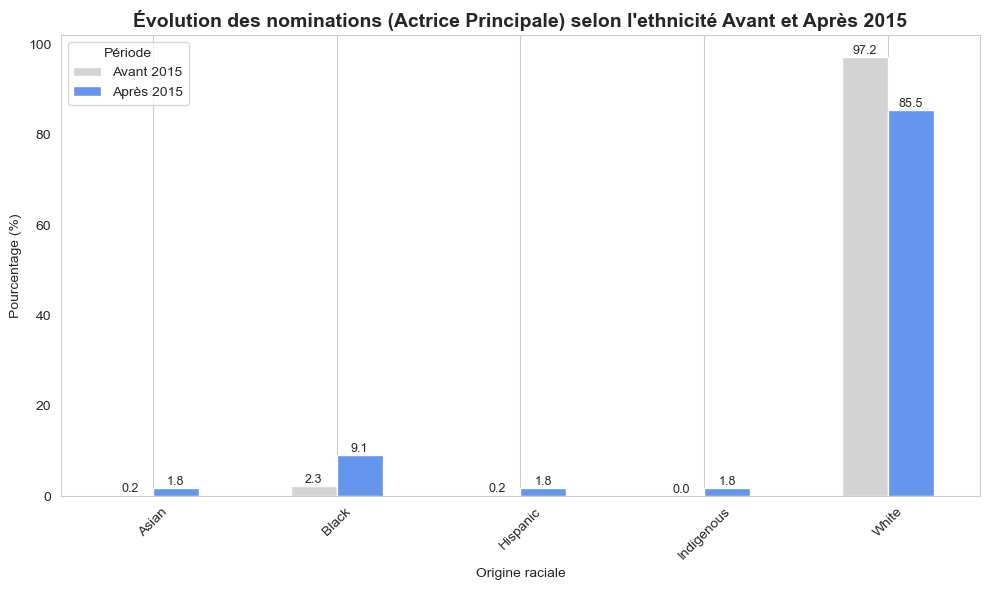

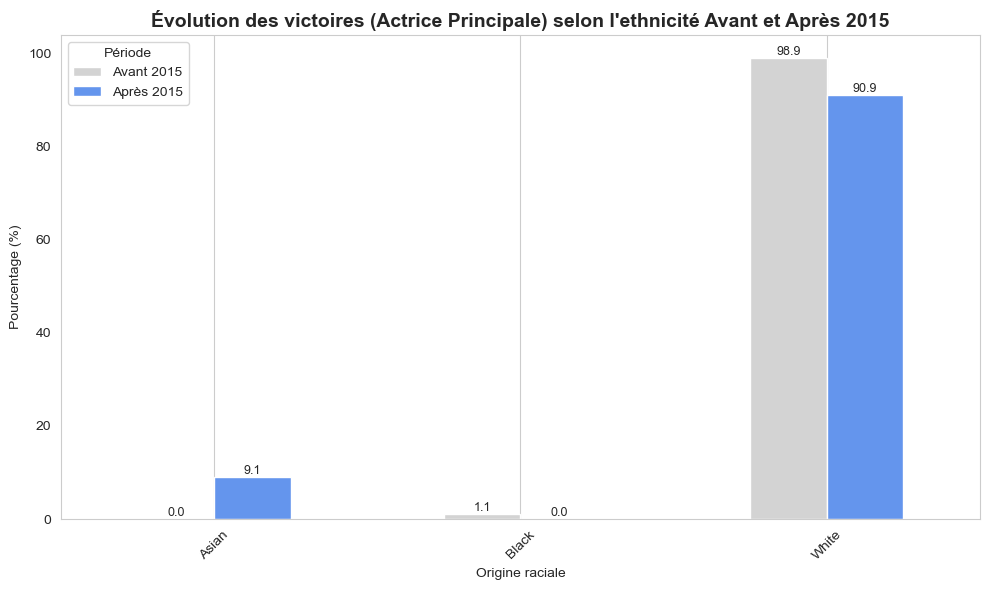

In [95]:
# ===================== ÉVOLUTION DES NOMINATIONS : ACTRICE PRINCIPALE AVANT VS APRÈS 2015 =====================

# Séparer les nominations avant et après 2015 pour les actrices principales
fe_pre15 = female_leads[female_leads["year_ceremony"] < 2015]
fe_post15 = female_leads[female_leads["year_ceremony"] >= 2015]

# Calcul des fréquences par origine ethnique
pre_counts = fe_pre15["race"].value_counts(normalize=True).mul(100).round(2)
post_counts = fe_post15["race"].value_counts(normalize=True).mul(100).round(2)

# Fusion des données dans un même DataFrame
race_comparison_female = pd.DataFrame({
    "Avant 2015": pre_counts,
    "Après 2015": post_counts
}).fillna(0)

# Création du graphique (Graphique 39 :)
ax = race_comparison_female.plot(
    kind="bar", 
    figsize=(10, 6), 
    color=["lightgray", "cornflowerblue"]
)

plt.title("Évolution des nominations (Actrice Principale) selon l'ethnicité Avant et Après 2015", fontsize=14, weight='bold')
plt.ylabel("Pourcentage (%)")
plt.xlabel("Origine raciale")
plt.xticks(rotation=45)
plt.legend(title="Période")
plt.grid(axis='y')
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f", label_type="edge", fontsize=9)
plt.tight_layout()
plt.show()

# ===================== ÉVOLUTION DES VICTOIRES : ACTRICE PRINCIPAL AVANT VS APRÈS 2015 =====================

# Séparer les gagnantes avant et après 2015 pour les actrices principales
fw_pre15 = female_winners[female_winners["year_ceremony"] < 2015]
fw_post15 = female_winners[female_winners["year_ceremony"] >= 2015]

# Calcul des fréquences par origine ethnique
pre_w_counts = fw_pre15["race"].value_counts(normalize=True).mul(100).round(2)
post_w_counts = fw_post15["race"].value_counts(normalize=True).mul(100).round(2)

# Fusion des données dans un même DataFrame
race_comparison_female_wins = pd.DataFrame({
    "Avant 2015": pre_w_counts,
    "Après 2015": post_w_counts
}).fillna(0)

# Création du graphique (Graphique 40 :)
ax = race_comparison_female_wins.plot(
    kind="bar", 
    figsize=(10, 6), 
    color=["lightgray", "cornflowerblue"]
)

plt.title("Évolution des victoires (Actrice Principale) selon l'ethnicité Avant et Après 2015", fontsize=14, weight='bold')
plt.ylabel("Pourcentage (%)")
plt.xlabel("Origine raciale")
plt.xticks(rotation=45)
plt.legend(title="Période")
plt.grid(axis='y')
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f", label_type="edge", fontsize=9)
plt.tight_layout()
plt.show()

### Le Mouvement #MeToo

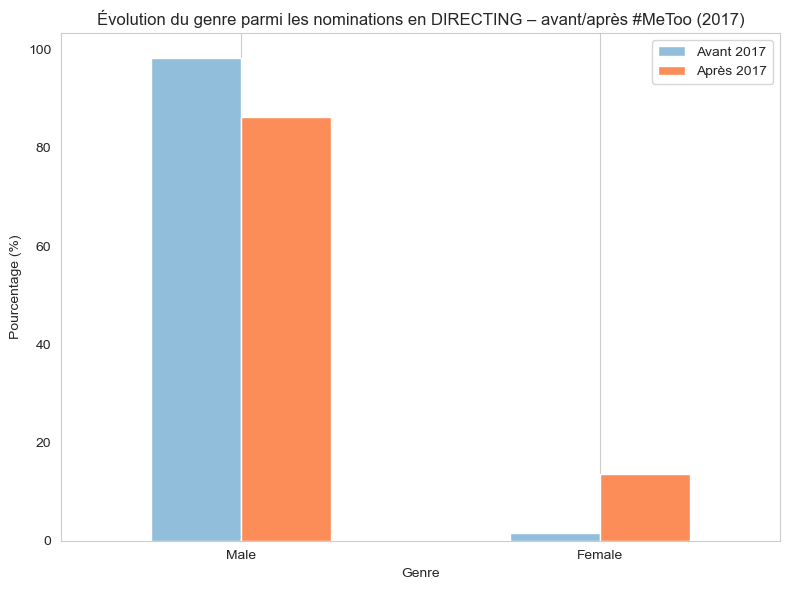

In [97]:
#============= Évolution du genre chez les nominés en DIRECTING avant et après #MeToo (2017): ===============

# Filtrer les nominations en DIRECTING (gagnants et non-gagnants)
nominations_directing = filtered_clean[filtered_clean['canon_category'] == 'DIRECTING'].copy()

# Séparer avant et après 2017
before_2017 = nominations_directing[nominations_directing['year_ceremony'] < 2017]
after_2017 = nominations_directing[nominations_directing['year_ceremony'] >= 2017]

# Calcul des pourcentages de genre
gender_dist_before = before_2017['gender'].value_counts(normalize=True) * 100
gender_dist_after = after_2017['gender'].value_counts(normalize=True) * 100

# Fusionner les deux en DataFrame
gender_comparison = pd.DataFrame({
    'Avant 2017': gender_dist_before,
    'Après 2017': gender_dist_after
}).fillna(0)

#------------- Graphique N°41: Évolution du genre parmi les nominations en DIRECTING – avant/après #MeToo (2017).
gender_comparison.plot(kind='bar', figsize=(8, 6), color=['#91bfdb', '#fc8d59'])
plt.title("Évolution du genre parmi les nominations en DIRECTING – avant/après #MeToo (2017)")
plt.ylabel("Pourcentage (%)")
plt.xlabel("Genre")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

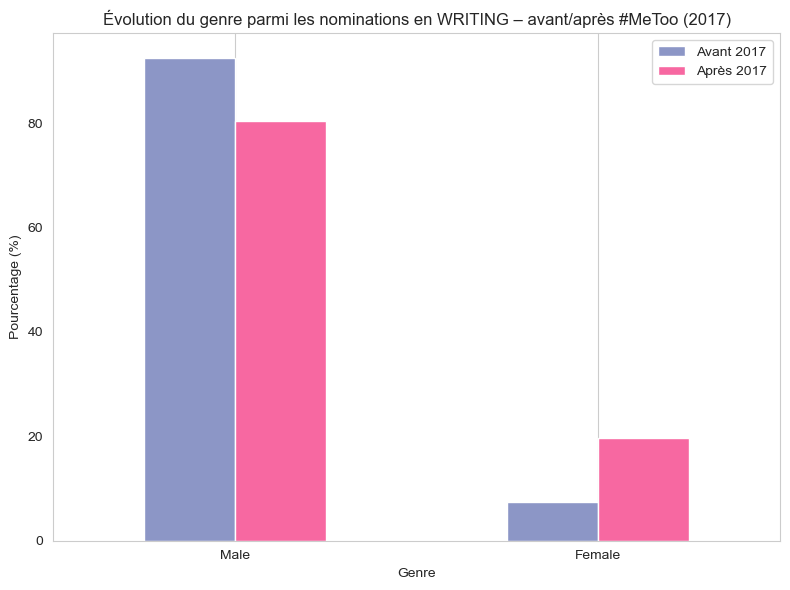

In [98]:
#============= Évolution du genre parmi les nominations en WRITING – avant/après #MeToo (2017): ==================

# Filtrer les nominations en WRITING (gagnants et non-gagnants)
nominations_writing = filtered_clean[filtered_clean['canon_category'] == 'WRITING'].copy()

# Séparer avant et après 2017
before_2017 = nominations_writing[nominations_writing['year_ceremony'] < 2017]
after_2017 = nominations_writing[nominations_writing['year_ceremony'] >= 2017]

# Calcul des pourcentages de genre
gender_dist_before = before_2017['gender'].value_counts(normalize=True) * 100
gender_dist_after = after_2017['gender'].value_counts(normalize=True) * 100

# Fusionner les deux en DataFrame
gender_comparison = pd.DataFrame({
    'Avant 2017': gender_dist_before,
    'Après 2017': gender_dist_after
}).fillna(0)

#-------------- Graphique N°42:Évolution du genre parmi les nominations en WRITING – avant/après #MeToo (2017).
gender_comparison.plot(kind='bar', figsize=(8, 6), color=['#8c96c6', '#f768a1'])
plt.title("Évolution du genre parmi les nominations en WRITING – avant/après #MeToo (2017)")
plt.ylabel("Pourcentage (%)")
plt.xlabel("Genre")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

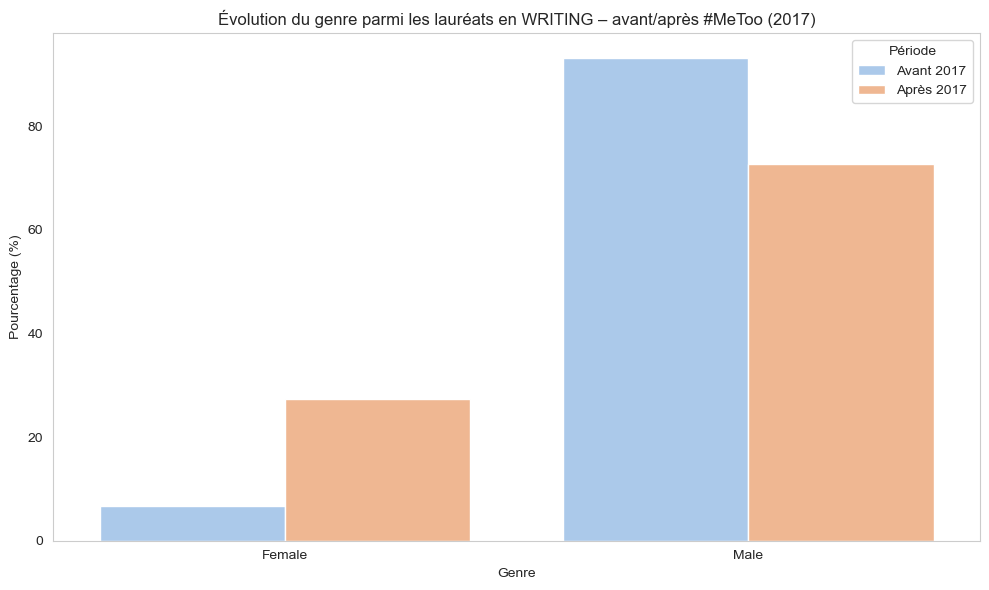

In [99]:
#============= Évolution du genre parmi les lauréats en WRITING – avant/après #MeToo (2017): ================

# Filtrer les lauréats dans la catégorie WRITING
laureates_writing = filtered_clean[
    (filtered_clean['winner'] == True) & 
    (filtered_clean['canon_category'] == 'WRITING')
].copy()

# Séparer avant et après 2017 (avant/après #MeToo)
before_metoo_writing = laureates_writing[laureates_writing['year_ceremony'] < 2017]
after_metoo_writing = laureates_writing[laureates_writing['year_ceremony'] >= 2017]

# Calcul des pourcentages de genre avant et après #MeToo
def compute_percentage(df, label):
    return (
        df.groupby(['gender'])
        .size()
        .div(len(df))
        .mul(100)
        .reset_index(name=label)
    )

before_percent_writing = compute_percentage(before_metoo_writing, 'Avant 2017')
after_percent_writing = compute_percentage(after_metoo_writing, 'Après 2017')

# Fusionner les données avant et après #MeToo
merged_df_writing = pd.merge(before_percent_writing, after_percent_writing, on='gender', how='outer').fillna(0)

# Préparer les données pour le graphique
plot_df_writing = pd.melt(
    merged_df_writing,
    id_vars=['gender'],
    var_name='Période',
    value_name='Pourcentage'
)

#--------------- Graphique N°43:Évolution du genre parmi les lauréats en WRITING – avant/après #MeToo (2017).

plt.figure(figsize=(10, 6))
sns.barplot(data=plot_df_writing, x='gender', y='Pourcentage', hue='Période', palette='pastel', errorbar=None)
plt.title("Évolution du genre parmi les lauréats en WRITING – avant/après #MeToo (2017)")
plt.ylabel("Pourcentage (%)")
plt.xlabel("Genre")
plt.grid(axis='y')
plt.legend(title='Période')
plt.tight_layout()
plt.show()

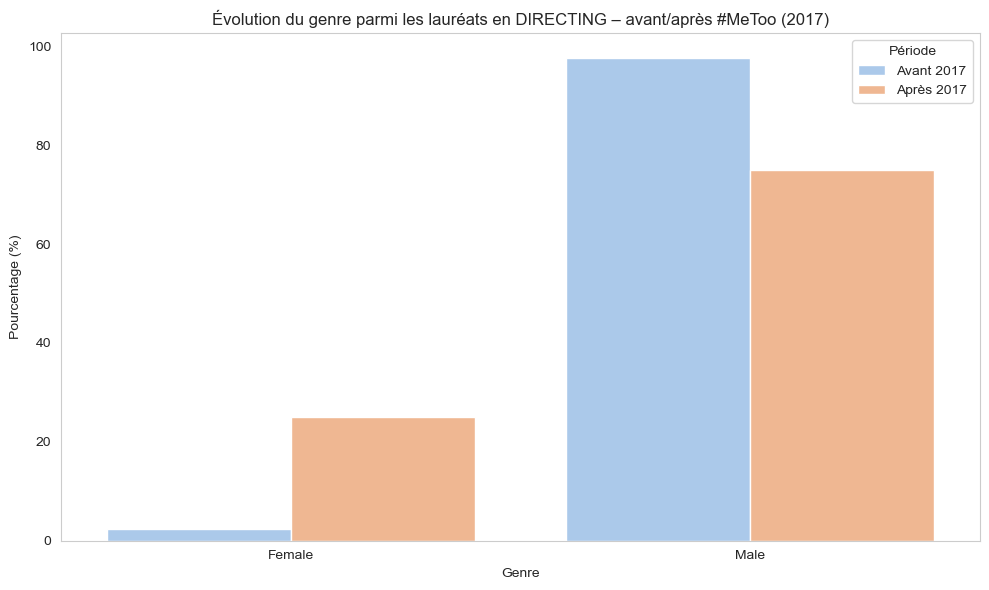

In [100]:
#============= Évolution du genre parmi les lauréats en DIRECTING – avant/après #MeToo (2017): ================
 
# Filtrer les lauréats dans la catégorie DIRECTING
laureates_directing = filtered_clean[
    (filtered_clean['winner'] == True) & 
    (filtered_clean['canon_category'] == 'DIRECTING')
].copy()

# Séparer avant et après 2017 (avant/après #MeToo)
before_metoo_directing = laureates_directing[laureates_directing['year_ceremony'] < 2017]
after_metoo_directing = laureates_directing[laureates_directing['year_ceremony'] >= 2017]

# Calcul des pourcentages de genre avant et après #MeToo
def compute_percentage(df, label):
    return (
        df.groupby(['gender'])
        .size()
        .div(len(df))
        .mul(100)
        .reset_index(name=label)
    )

before_percent_directing = compute_percentage(before_metoo_directing, 'Avant 2017')
after_percent_directing = compute_percentage(after_metoo_directing, 'Après 2017')

# Fusionner les données avant et après #MeToo
merged_df_directing = pd.merge(before_percent_directing, after_percent_directing, on='gender', how='outer').fillna(0)

# Préparer les données pour le graphique
plot_df_directing = pd.melt(
    merged_df_directing,
    id_vars=['gender'],
    var_name='Période',
    value_name='Pourcentage'
)

#-------------  Graphique N°44:Évolution du genre parmi les lauréats en DIRECTING – avant/après #MeToo (2017).

plt.figure(figsize=(10, 6))
sns.barplot(data=plot_df_directing, x='gender', y='Pourcentage', hue='Période', palette='pastel',errorbar=None)
plt.title("Évolution du genre parmi les lauréats en DIRECTING – avant/après #MeToo (2017)")
plt.ylabel("Pourcentage (%)")
plt.xlabel("Genre")
plt.grid(axis='y')
plt.legend(title='Période')
plt.tight_layout()
plt.show()

### Les Mouvements #BlackLivesMatter & Stop Asian Hate 

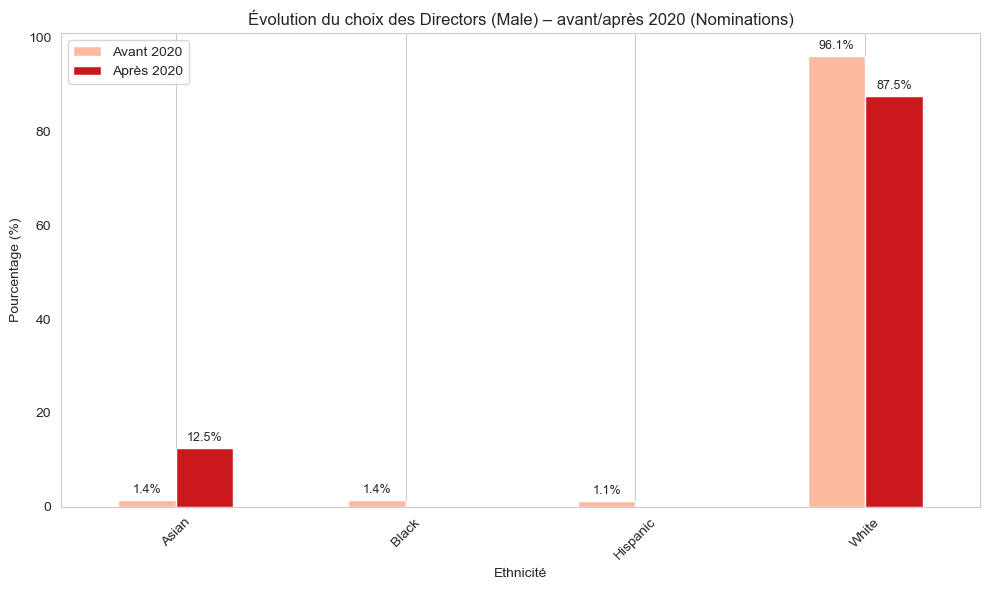

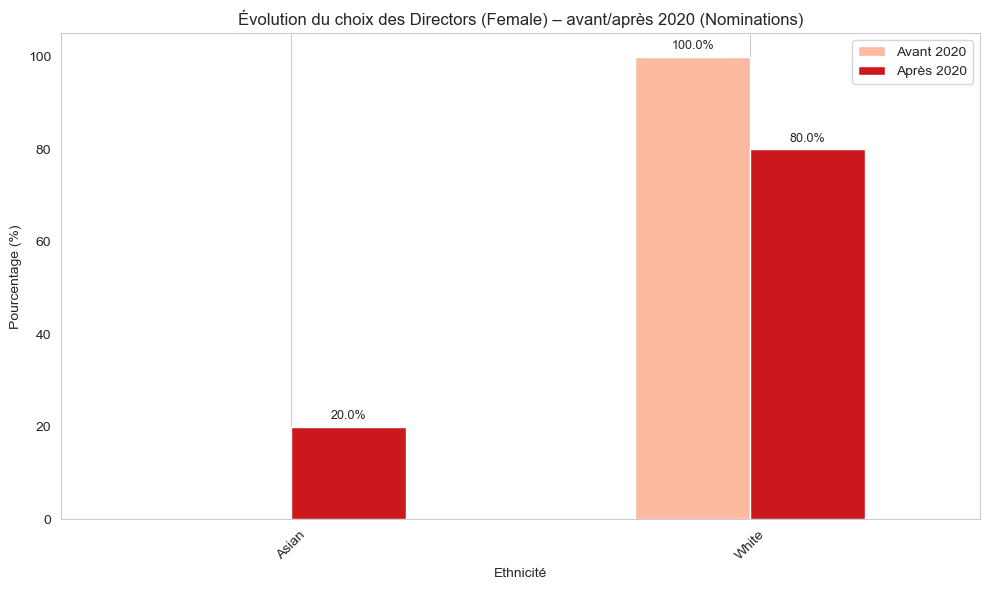

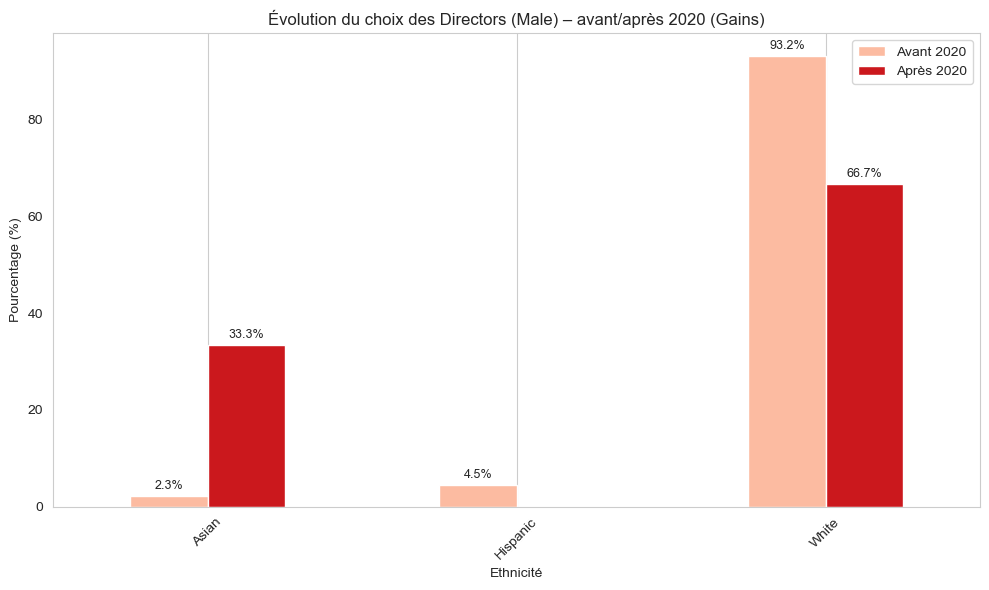

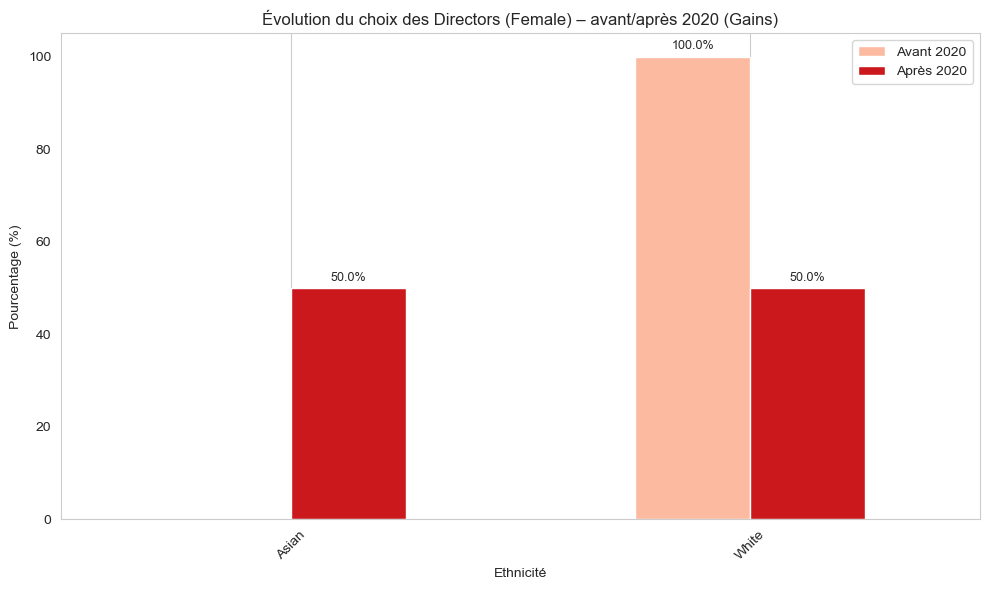

In [102]:
#Pour l'année 2020:
# Données pour les réalisateurs/réalisatrices
directors_data = filtered_clean[filtered_clean['canon_category'] == 'DIRECTING']

def analyze_race_change_before_after_2020_by_gender(directors_data, role_name="Professionnels", gender="Male", analysis_type="nominations"):
    # Filtrage par genre
    data = directors_data[directors_data['gender'] == gender]
    
    # Séparation avant et après 2020
    before = data[data['year_ceremony'] < 2020]
    after = data[data['year_ceremony'] >= 2020]
    
    if analysis_type == "nominations":
        race_before = before.groupby(['race']).size().div(len(before)).mul(100)
        race_after = after.groupby(['race']).size().div(len(after)).mul(100)
    elif analysis_type == "gains":
        winners_before = before[before['winner'] == True]
        winners_after = after[after['winner'] == True]

        race_before = winners_before.groupby(['race']).size().div(len(winners_before)).mul(100)
        race_after = winners_after.groupby(['race']).size().div(len(winners_after)).mul(100)
    
    race_df = pd.DataFrame({'Avant 2020': race_before, 'Après 2020': race_after}).fillna(0)

    # Création du graphique
    ax = race_df.plot(kind='bar', figsize=(10, 6), color=['#fcbba1', '#cb181d'])

    # Ajout des annotations de pourcentages
    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            if height > 0:
                ax.annotate(f'{height:.1f}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                            xytext=(0, 3), textcoords='offset points',
                            ha='center', va='bottom', fontsize=9)

    plt.title(f"Évolution du choix des {role_name} ({gender}) – avant/après 2020 ({analysis_type.capitalize()})")
    plt.ylabel("Pourcentage (%)")
    plt.xlabel("Ethnicité")
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()
    
# DIRECTORS – Hommes – Nominations (Graphique 45)
analyze_race_change_before_after_2020_by_gender(
    directors_data, role_name="Directors", gender="Male", analysis_type="nominations"
)

# DIRECTORS – Femmes – Nominations (Graphique 46)
analyze_race_change_before_after_2020_by_gender(
    directors_data, role_name="Directors", gender="Female", analysis_type="nominations"
)

# DIRECTORS – Hommes – Gains (Graphique 47)
analyze_race_change_before_after_2020_by_gender(
    directors_data, role_name="Directors", gender="Male", analysis_type="gains"
)

# DIRECTORS – Femmes – Gains (Graphique 48)
analyze_race_change_before_after_2020_by_gender(
    directors_data, role_name="Directors", gender="Female", analysis_type="gains"
)

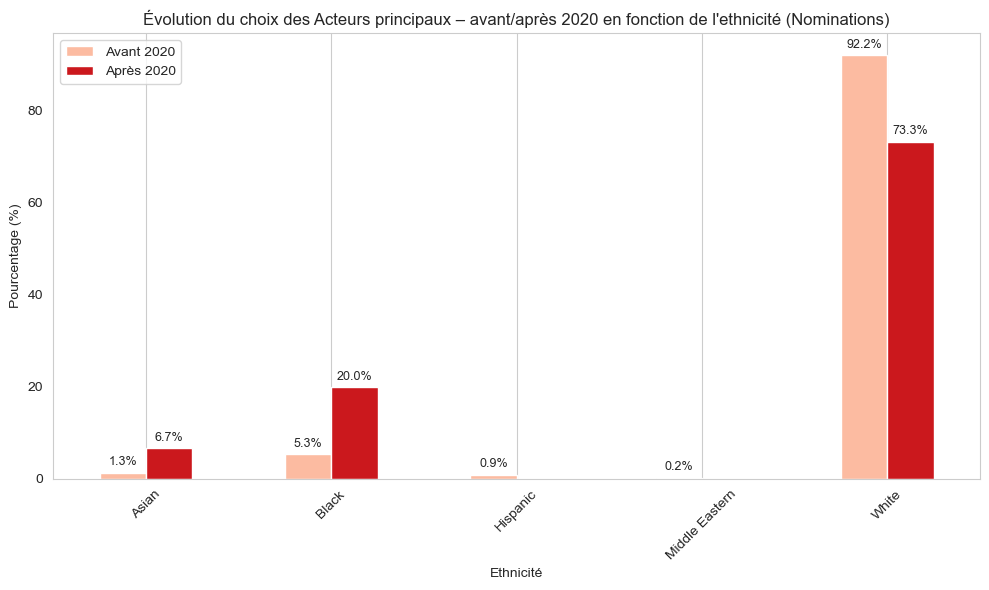

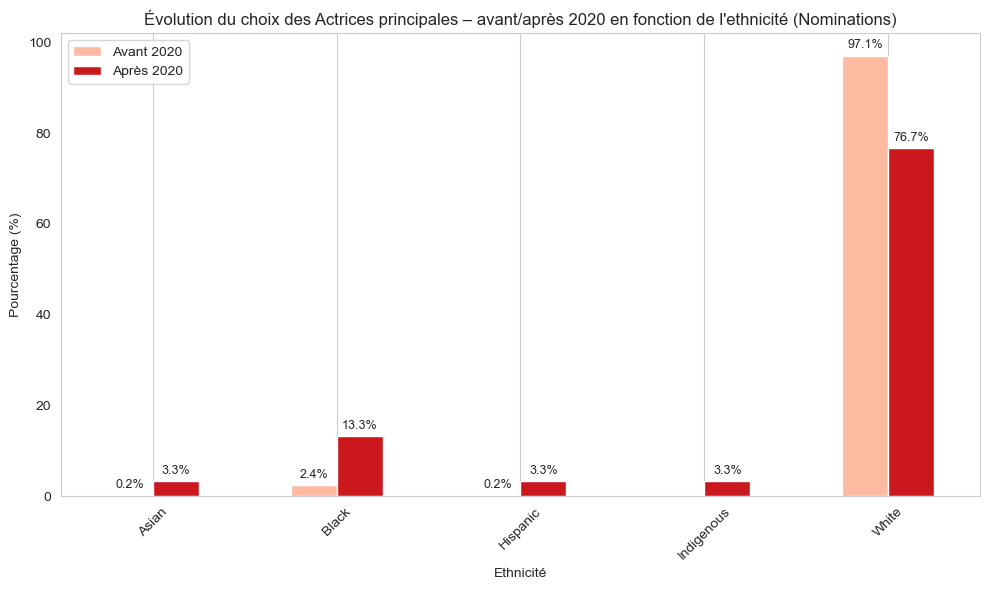

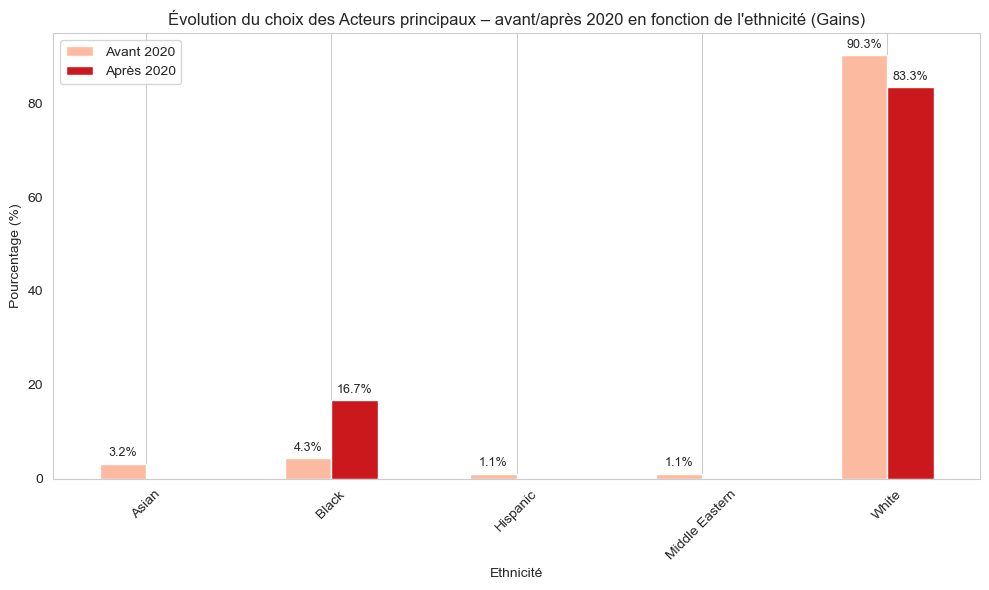

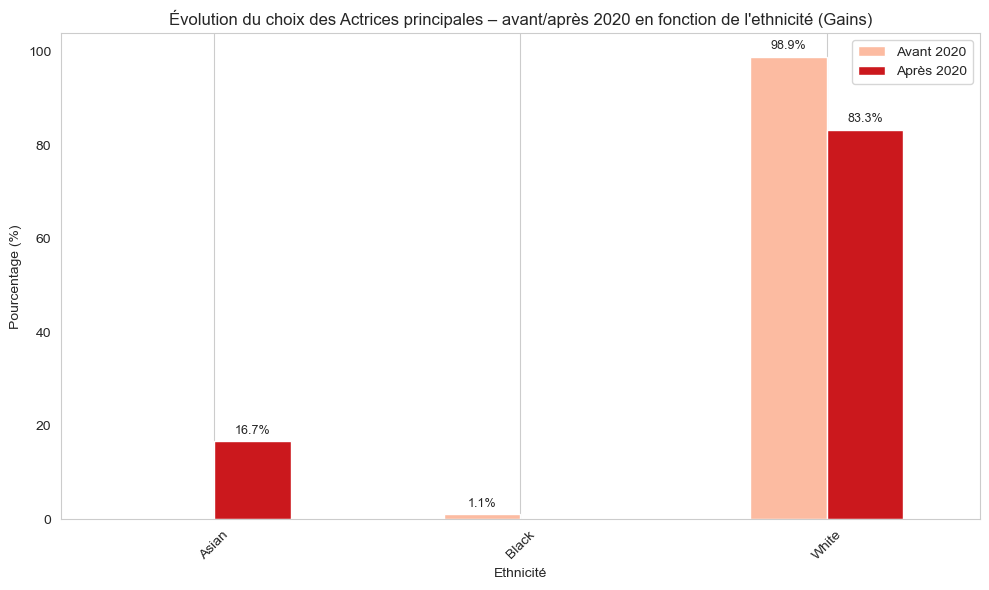

In [111]:
# Pour les Leading roles
leading_roles = filtered_clean[filtered_clean['canon_category'].isin([
    'ACTOR IN A LEADING ROLE',
    'ACTRESS IN A LEADING ROLE'
])]

# Fonction pour analyser l’évolution selon l’ethnicité
def analyze_race_change_before_after_2020(data, role_name="Acteurs/Actrices", analysis_type="nominations"):
    before = data[data['year_ceremony'] < 2020]
    after = data[data['year_ceremony'] >= 2020]
   
    if analysis_type == "nominations":
        race_before = before.groupby(['race']).size().div(len(before)).mul(100)
        race_after = after.groupby(['race']).size().div(len(after)).mul(100)
   
    elif analysis_type == "gains":
        winners_before = before[before['winner'] == True]
        winners_after = after[after['winner'] == True]

        race_before = winners_before.groupby(['race']).size().div(len(winners_before)).mul(100)
        race_after = winners_after.groupby(['race']).size().div(len(winners_after)).mul(100)

    race_df = pd.DataFrame({'Avant 2020': race_before, 'Après 2020': race_after}).fillna(0)

    ax = race_df.plot(kind='bar', figsize=(10, 6), color=['#fcbba1', '#cb181d'])

    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            if height > 0:
                ax.annotate(f'{height:.1f}%',
                            xy=(bar.get_x() + bar.get_width() / 2, height),
                            xytext=(0, 3), textcoords='offset points',
                            ha='center', va='bottom', fontsize=9)

    plt.title(f"Évolution du choix des {role_name} – avant/après 2020 en fonction de l'ethnicité ({analysis_type.capitalize()})")
    plt.ylabel("Pourcentage (%)")
    plt.xlabel("Ethnicité")
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

# ========== Utilisation de la fonction ==========

# Acteurs principaux – Nominations (Graphique 49)
analyze_race_change_before_after_2020(
    leading_roles[leading_roles['canon_category'] == 'ACTOR IN A LEADING ROLE'],
    "Acteurs principaux",
    "nominations"
)

# Actrices principales – Nominations (Graphique 50)
analyze_race_change_before_after_2020(
    leading_roles[leading_roles['canon_category'] == 'ACTRESS IN A LEADING ROLE'],
    "Actrices principales",
    "nominations"
)

# Acteurs principaux – Gains (Graphique 51)
analyze_race_change_before_after_2020(
    leading_roles[leading_roles['canon_category'] == 'ACTOR IN A LEADING ROLE'],
    "Acteurs principaux",
    "gains"
)

# Actrices principales – Gains (Graphique 52)
analyze_race_change_before_after_2020(
    leading_roles[leading_roles['canon_category'] == 'ACTRESS IN A LEADING ROLE'],
    "Actrices principales",
    "gains"
)


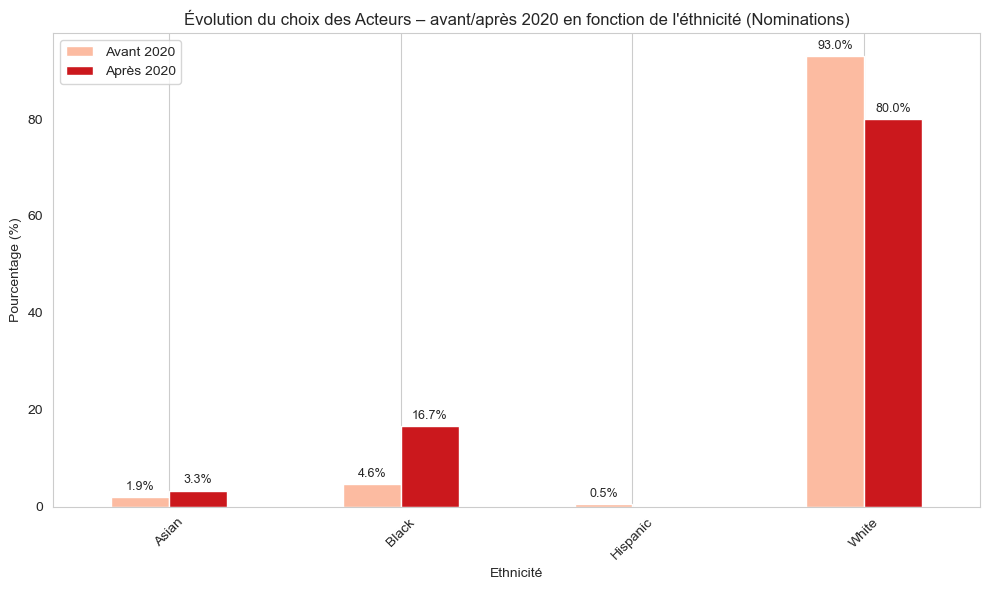

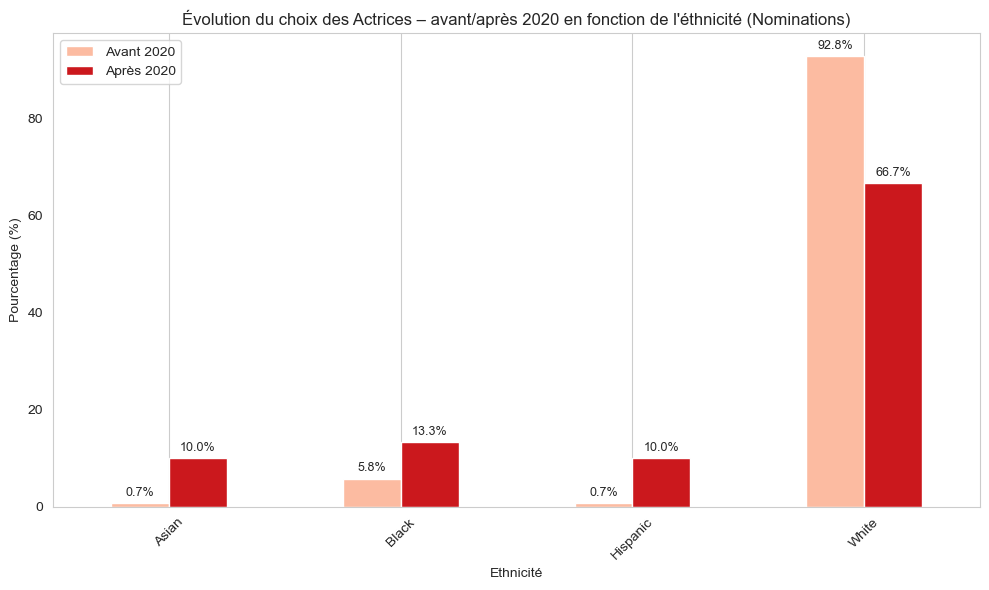

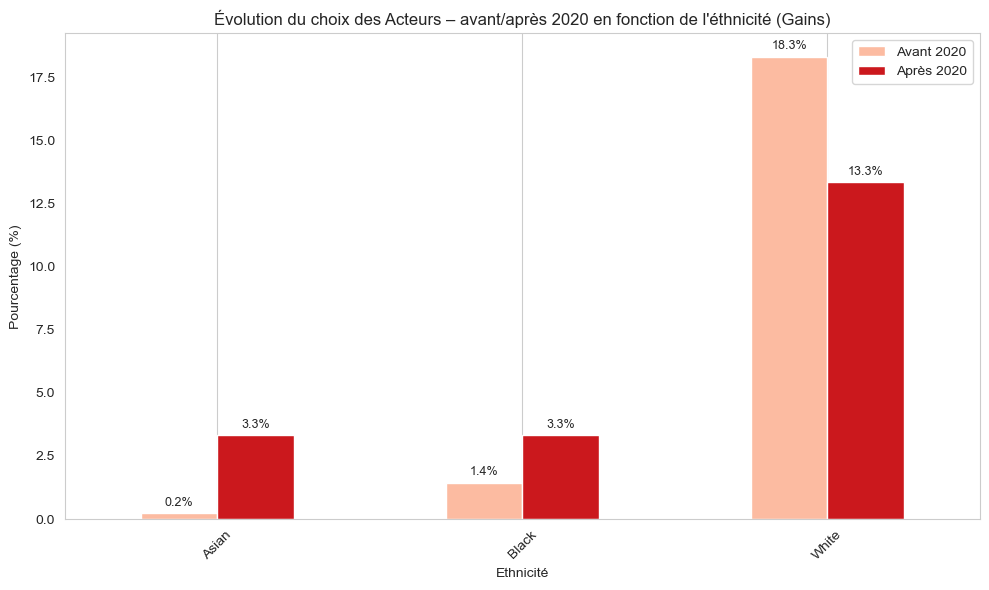

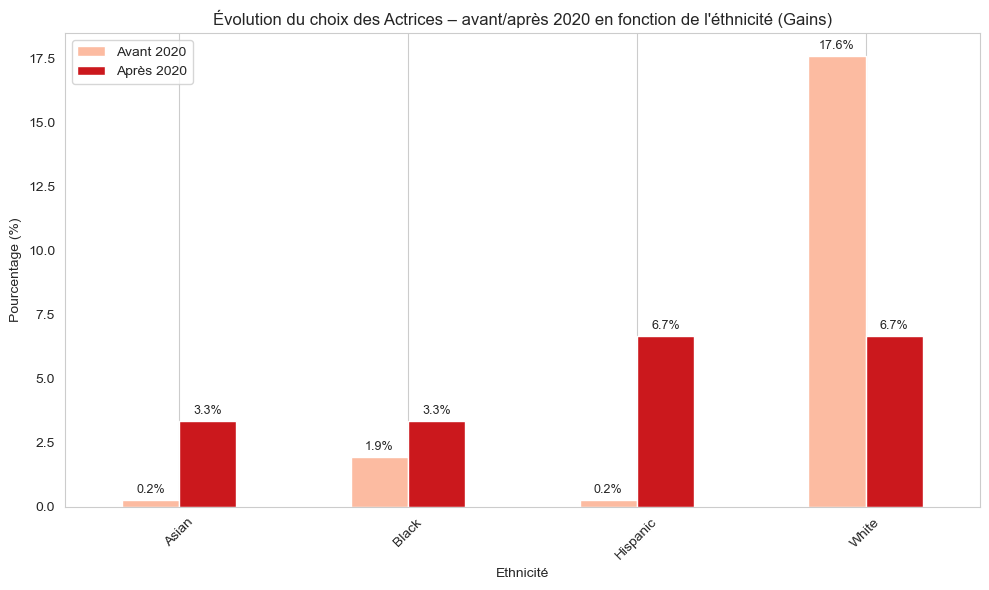

In [106]:
#Pour les supporting roles 
def analyze_race_change_before_after_2020(supporting_roles, role_name="Acteurs/Actrices", analysis_type="nominations"):
    # Séparation avant et après 2020
    before = supporting_roles[supporting_roles['year_ceremony'] < 2020]
    after = supporting_roles[supporting_roles['year_ceremony'] >= 2020]
    
    if analysis_type == "nominations":
        race_before = before.groupby(['race']).size().div(len(before)).mul(100)
        race_after = after.groupby(['race']).size().div(len(after)).mul(100)
    elif analysis_type == "gains":
        race_before = before[before['winner'] == True].groupby(['race']).size().div(len(before)).mul(100)
        race_after = after[after['winner'] == True].groupby(['race']).size().div(len(after)).mul(100)
    
    race_df = pd.DataFrame({'Avant 2020': race_before, 'Après 2020': race_after}).fillna(0)

    # Création du graphique
    ax = race_df.plot(kind='bar', figsize=(10, 6), color=['#fcbba1', '#cb181d'])

    # Ajout des annotations (pourcentages sur les barres)
    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            if height > 0:
                ax.annotate(f'{height:.1f}%', 
                            xy=(bar.get_x() + bar.get_width() / 2, height),
                            xytext=(0, 3), textcoords='offset points',
                            ha='center', va='bottom', fontsize=9)

    plt.title(f"Évolution du choix des {role_name} – avant/après 2020 en fonction de l'éthnicité ({analysis_type.capitalize()})")
    plt.ylabel("Pourcentage (%)")
    plt.xlabel("Ethnicité")
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout() 
    plt.show()

# Utilisation pour les acteurs (nominations) (Graphique 53)
analyze_race_change_before_after_2020(supporting_roles[supporting_roles['canon_category'] == 'ACTOR IN A SUPPORTING ROLE'], "Acteurs", "nominations")

# Utilisation pour les actrices (nominations) (Graphique 54)
analyze_race_change_before_after_2020(supporting_roles[supporting_roles['canon_category'] == 'ACTRESS IN A SUPPORTING ROLE'], "Actrices", "nominations")

# Utilisation pour les acteurs (gains) (Graphique 55)
analyze_race_change_before_after_2020(supporting_roles[supporting_roles['canon_category'] == 'ACTOR IN A SUPPORTING ROLE'], "Acteurs", "gains")

# Utilisation pour les actrices (gains)(Graphique 56)
analyze_race_change_before_after_2020(supporting_roles[supporting_roles['canon_category'] == 'ACTRESS IN A SUPPORTING ROLE'], "Actrices", "gains")